In [1]:
import os,glob
from skimage import segmentation,feature,morphology,exposure,measure,graph,filters,util
import tifffile
import matplotlib.pyplot as plt
from skimage.util import invert
import numpy as np
import pandas as pd
import timeit
import re
import multiprocessing as mp
import pickle as pk

In [2]:
cd ~/PycharmProjects/IMYG_2/

/Users/jz-rolling/PycharmProjects/IMyG_2


In [3]:
import IMyG as im

In [4]:
def generate_96_well_plate():
    rows = ["A","B","C","D","E","F","G","H"]
    columns = np.linspace(1,12,12).astype(int)
    plate = pd.DataFrame(0,index=rows,columns=columns)
    return(plate)
    
def read_from_plate(input_path,plate,n_cores = 4):
    files = glob.glob(input_path+"*.nd2")
    output_path = input_path+"output/"
    #pattern = re.compile("Well([A-Z])([0-9]{1,2})")
    pattern = re.compile("MSR1_([A-Z])([0-9]{1,2})")
    if len(files) == 0:
        print("Empty folder!")
    else:
        print("%d .nd2 files found in input directory."%(len(files)))
    if not os.path.isdir(output_path):
        os.mkdir(output_path)
    count_plate = generate_96_well_plate()
    for i in range(0,len(files),n_cores):
        processes = []
        for j in range(0,min(n_cores,len(files)-i)):
            file = files[i+j]
            row,column = re.search(pattern,file).group(1),re.search(pattern,file).group(2)
            #print(row,int(column))
            count = count_plate[int(column)][row]
            #print(count)
            subfolder = output_path+"Well_{}{}/".format(row,column)
            if not os.path.isdir(subfolder):
                os.mkdir(subfolder)
            count_plate[int(column)][row]+=1
            header = "{}_{}{}_{}".format(plate,row,column,count)
            processes.append(mp.Process(target=im.IO.pickel_dump,args=(file,subfolder,header,count)))
        for p in processes:
            p.start()
        for p in processes:
            p.join()
    count_plate.to_excel(output_path+"plate_count.xls")
    return(count_plate)


In [5]:
read_from_plate("/Volumes/Sam/MSR1_IDW/plate1_raw_files/11032019_raw_files/","MSR1_1103")

76 .nd2 files found in input directory.


,1,2,3,4,5,6,7,8,9,10,11,12
A,0,0,0,0,0,4,0,0,0,0,0,0
B,0,0,0,0,0,4,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,0,0
D,4,4,4,4,0,4,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,0,4
F,4,4,4,0,4,4,4,0,0,0,0,4
G,0,0,0,4,4,4,0,0,0,0,0,4
H,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
root_folder = "/Volumes/Sam/"
MSR_folders = glob.glob(root_folder+"MSR*_IDW/")
#pattern = re.compile("(MSR[0-9]{1,2})")


for i in [13]:
    folder = root_folder+"MSR{}_IDW/".format(i)
    name = folder.split("/")[-2]
    plate = "MSR{}".format(i)
    subfolders = glob.glob(folder+"*raw_files/")
    if len(subfolders) == 1:
        print("Processing plate %s"%(plate))
        if len(glob.glob(subfolders[0]+"*raw_files/"))!=0:
            for babyfolder in glob.glob(subfolders[0]+"*raw_files/"):
                count_plate = read_from_plate(babyfolder,plate)
        else:
            count_plate = read_from_plate(subfolders[0],plate)
"""
folder = root_folder+"MSR_PP1_IDW/"
name = folder.split("/")[-2]
plate = "MSR_PP1"
subfolders = glob.glob(folder+"*raw_files/")
if len(subfolders) == 1:
    print("Processing plate %s"%(plate))
    if len(glob.glob(subfolders[0]+"*raw_files/"))!=0:
        for babyfolder in glob.glob(subfolders[0]+"*raw_files/"):
            count_plate = read_from_plate(babyfolder,plate)
    else:
        count_plate = read_from_plate(subfolders[0],plate)
"""

Processing plate MSR13
100 .nd2 files found in input directory.


'\nfolder = root_folder+"MSR_PP1_IDW/"\nname = folder.split("/")[-2]\nplate = "MSR_PP1"\nsubfolders = glob.glob(folder+"*raw_files/")\nif len(subfolders) == 1:\n    print("Processing plate %s"%(plate))\n    if len(glob.glob(subfolders[0]+"*raw_files/"))!=0:\n        for babyfolder in glob.glob(subfolders[0]+"*raw_files/"):\n            count_plate = read_from_plate(babyfolder,plate)\n    else:\n        count_plate = read_from_plate(subfolders[0],plate)\n'

In [9]:
count_plate = read_from_plate("/Volumes/Sam/MSR12_IDW/MSR12_raw_files/10242019_raw_files/","MSR12")

153 .nd2 files found in input directory.
(106,)
(174,)
(178,)
(76,)
(86,)
(122,)
(220,)
(162,)
(126,)
(140,)
(166,)
(164,)
(136,)
(136,)
(94,)
(78,)
(104,)
(130,)
(74,)
(106,)
(114,)
(134,)
(110,)
(90,)
(82,)
(136,)
(114,)
(152,)
(88,)
(142,)
(150,)
(98,)
(112,)
(180,)
(230,)
(192,)
(214,)
(130,)
(172,)
(70,)
(162,)
(196,)
(140,)
(86,)
(128,)
(98,)
(102,)
(142,)
(98,)
(152,)
(138,)
(102,)
(78,)
(68,)
(180,)
(126,)
(112,)
(146,)
(112,)
(82,)
(122,)
(150,)
(148,)
(108,)
(158,)
(88,)
(114,)
(126,)
(172,)
(90,)
(116,)
(208,)
(116,)
(132,)
(128,)
(140,)
(154,)
(166,)
(178,)
(130,)
(126,)
(154,)
(158,)
(292,)
(162,)
(160,)
(166,)
(88,)
(110,)
(210,)
(108,)
(112,)
(136,)
(94,)
(144,)
(124,)
(98,)
(92,)
(86,)
(104,)
(172,)
(134,)
(100,)
(130,)
(92,)
(148,)
(142,)
(100,)
(126,)
(102,)
(162,)
(198,)
(164,)
(144,)
(108,)
(132,)
(194,)
(154,)
(106,)
(106,)
(134,)
(154,)
(92,)
(112,)
(96,)
(168,)
(98,)
(168,)
(88,)
(130,)
(108,)
(84,)
(150,)
(116,)
(186,)
(136,)
(96,)
(118,)
(156,)
(80,)
(120,)
(10

(132,)
(168,)
(148,)
(100,)
(114,)
(134,)
(140,)
(96,)
(122,)
(82,)
(84,)
(96,)
(74,)
(102,)
(122,)
(82,)
(110,)
(108,)
(144,)
(106,)
(112,)
(122,)
(210,)
(136,)
(100,)
(146,)
(106,)
(168,)
(156,)
(130,)
(164,)
(120,)
(130,)
(172,)
(104,)
(108,)
(178,)
(120,)
(98,)
(220,)
(90,)
(164,)
(154,)
(150,)
(118,)
(194,)
(90,)
(84,)
(92,)
(94,)
(90,)
(106,)
(106,)
(124,)
(134,)
(140,)
(124,)
(200,)
(122,)
(220,)
(122,)
(150,)
(194,)
(144,)
(130,)
(270,)
(132,)
(84,)
(96,)
(86,)
(178,)
(74,)
(126,)
(126,)
(78,)
(98,)
(84,)
(106,)
(106,)
(82,)
(104,)
(98,)
(94,)
(130,)
(114,)
(104,)
(124,)
(94,)
(104,)
(132,)
(98,)
(258,)
(112,)
(102,)
(116,)
(96,)
(108,)
(132,)
(76,)
(90,)
(104,)
(96,)
(102,)
(106,)
(78,)
(212,)
(110,)
(114,)
(104,)
(102,)
(152,)
(90,)
(120,)
(138,)
(56,)
(84,)
(112,)
(122,)
(120,)
(46,)
(108,)
(138,)
(98,)
(110,)
(78,)
(78,)
(114,)
(226,)
(80,)
(92,)
(64,)
(88,)
(72,)
(76,)
(90,)
(98,)
(106,)
(82,)
(106,)
(162,)
(68,)
(74,)
(102,)
(102,)
(88,)
(108,)
(140,)
(152,)
(92,)
(88,)
(

(108,)
(88,)
(184,)
(100,)
(186,)
(186,)
(130,)
(118,)
(146,)
(116,)
(118,)
(132,)
(128,)
(92,)
(172,)
(92,)
(78,)
(76,)
(86,)
(78,)
(156,)
(86,)
(104,)
(144,)
(120,)
(144,)
(130,)
(124,)
(132,)
(154,)
(194,)
(156,)
(166,)
(184,)
(92,)
(118,)
(216,)
(86,)
(70,)
(124,)
(80,)
(156,)
(96,)
(148,)
(94,)
(78,)
(94,)
(128,)
(142,)
(90,)
(94,)
(120,)
(134,)
(166,)
(204,)
(132,)
(106,)
(112,)
(108,)
(192,)
(76,)
(138,)
(114,)
(68,)
(82,)
(114,)
(114,)
(156,)
(130,)
(102,)
(142,)
(76,)
(128,)
(152,)
(156,)
(202,)
(90,)
(130,)
(110,)
(166,)
(144,)
(88,)
(174,)
(70,)
(116,)
(86,)
(102,)
(108,)
(118,)
(132,)
(164,)
(142,)
(160,)
(110,)
(72,)
(48,)
(104,)
(62,)
(270,)
(144,)
(88,)
(102,)
(140,)
(152,)
(180,)
(148,)
(146,)
(214,)
(118,)
(164,)
(148,)
(82,)
(60,)
(150,)
(128,)
(128,)
(164,)
(110,)
(78,)
(100,)
(60,)
(144,)
(108,)
(88,)
(130,)
(128,)
(106,)
(104,)
(80,)
(86,)
(146,)
(100,)
(98,)
(120,)
(76,)
(86,)
(138,)
(54,)
(132,)
(116,)
(132,)
(124,)
(100,)
(94,)
(78,)
(130,)
(98,)
(298,)
(122,)
(

(144,)
(102,)
(122,)
(78,)
(106,)
(84,)
(148,)
(112,)
(120,)
(126,)
(116,)
(160,)
(94,)
(106,)
(116,)
(116,)
(114,)
(86,)
(104,)
(212,)
(74,)
(196,)
(60,)
(196,)
(166,)
(122,)
(66,)
(152,)
(92,)
(138,)
(124,)
(128,)
(118,)
(150,)
(88,)
(110,)
(122,)
(96,)
(108,)
(150,)
(108,)
(90,)
(154,)
(110,)
(144,)
(80,)
(114,)
(70,)
(90,)
(90,)
(110,)
(80,)
(124,)
(184,)
(146,)
(102,)
(158,)
(168,)
(110,)
(154,)
(120,)
(90,)
(138,)
(66,)
(102,)
(74,)
(92,)
(148,)
(94,)
(114,)
(120,)
(68,)
(118,)
(132,)
(74,)
(122,)
(150,)
(90,)
(140,)
(122,)
(114,)
(70,)
(138,)
(126,)
(102,)
(132,)
(210,)
(114,)
(128,)
(132,)
(178,)
(102,)
(196,)
(162,)
(144,)
(128,)
(86,)
(76,)
(112,)
(106,)
(136,)
(136,)
(88,)
(176,)
(126,)
(102,)
(162,)
(216,)
(176,)
(160,)
(112,)
(168,)
(98,)
(140,)
(212,)
(114,)
(100,)
(86,)
(148,)
(186,)
(220,)
(238,)
(86,)
(128,)
(210,)
(108,)
(116,)
(130,)
(120,)
(146,)
(72,)
(140,)
(80,)
(108,)
(130,)
(226,)
(100,)
(168,)
(90,)
(118,)
(114,)
(168,)
(160,)
(74,)
(130,)
(142,)
(66,)
(152,)


(152,)
(98,)
(152,)
(92,)
(120,)
(116,)
(106,)
(144,)
(184,)
(130,)
(162,)
(140,)
(108,)
(134,)
(118,)
(182,)
(190,)
(120,)
(160,)
(118,)
(92,)
(144,)
(92,)
(100,)
(136,)
(96,)
(110,)
(168,)
(158,)
(134,)
(116,)
(138,)
(96,)
(128,)
(166,)
(142,)
(250,)
(122,)
(156,)
(170,)
(138,)
(70,)
(178,)
(130,)
(114,)
(208,)
(166,)
(106,)
(100,)
(76,)
(68,)
(162,)
(136,)
(90,)
(124,)
(162,)
(126,)
(174,)
(196,)
(98,)
(104,)
(152,)
(74,)
(150,)
(134,)
(88,)
(128,)
(76,)
(130,)
(94,)
(172,)
(164,)
(132,)
(150,)
(160,)
(146,)
(188,)
(100,)
(126,)
(120,)
(102,)
(122,)
(162,)
(126,)
(108,)
(110,)
(158,)
(146,)
(102,)
(112,)
(78,)
(124,)
(128,)
(144,)
(74,)
(120,)
(76,)
(102,)
(132,)
(186,)
(112,)
(78,)
(190,)
(78,)
(156,)
(228,)
(116,)
(104,)
(162,)
(92,)
(74,)
(150,)
(126,)
(180,)
(86,)
(122,)
(76,)
(70,)
(140,)
(166,)
(126,)
(150,)
(184,)
(186,)
(90,)
(118,)
(82,)
(198,)
(158,)
(106,)
(108,)
(144,)
(98,)
(122,)
(258,)
(172,)
(232,)
(198,)
(138,)
(146,)
(174,)
(122,)
(114,)
(48,)
(186,)
(70,)
(152,)
(

(130,)
(72,)
(108,)
(138,)
(112,)
(96,)
(78,)
(114,)
(92,)
(110,)
(94,)
(154,)
(128,)
(186,)
(110,)
(88,)
(92,)
(124,)
(84,)
(116,)
(134,)
(62,)
(56,)
(132,)
(132,)
(114,)
(108,)
(84,)
(116,)
(74,)
(98,)
(124,)
(96,)
(124,)
(80,)
(84,)
(94,)
(98,)
(114,)
(104,)
(100,)
(88,)
(106,)
(130,)
(138,)
(206,)
(110,)
(148,)
(114,)
(108,)
(106,)
(98,)
(118,)
(146,)
(120,)
(176,)
(92,)
(116,)
(102,)
(78,)
(134,)
(130,)
(154,)
(100,)
(92,)
(134,)
(170,)
(140,)
(100,)
(170,)
(78,)
(138,)
(124,)
(174,)
(132,)
(80,)
(118,)
(168,)
(102,)
(224,)
(104,)
(96,)
(96,)
(138,)
(120,)
(130,)
(116,)
(88,)
(100,)
(168,)
(108,)
(152,)
(116,)
(130,)
(158,)
(116,)
(118,)
(84,)
(84,)
(108,)
(128,)
(108,)
(108,)
(64,)
(84,)
(104,)
(160,)
(80,)
(120,)
(80,)
(146,)
(88,)
(90,)
(78,)
(116,)
(126,)
(106,)
(118,)
(318,)
(92,)
(106,)
(80,)
(76,)
(100,)
(124,)
(76,)
(112,)
(118,)
(72,)
(176,)
(136,)
(96,)
(118,)
(100,)
(72,)
(86,)
(80,)
(102,)
(118,)
(166,)
(86,)
(70,)
(132,)
(96,)
(80,)
(146,)
(122,)
(94,)
(122,)
(116,)
(

(80,)
(158,)
(162,)
(134,)
(100,)
(194,)
(174,)
(188,)
(72,)
(114,)
(136,)
(88,)
(102,)
(108,)
(94,)
(160,)
(110,)
(86,)
(80,)
(164,)
(98,)
(132,)
(72,)
(82,)
(140,)
(80,)
(94,)
(96,)
(94,)
(84,)
(192,)
(132,)
(94,)
(142,)
(156,)
(184,)
(136,)
(104,)
(104,)
(72,)
(72,)
(98,)
(96,)
(120,)
(118,)
(68,)
(98,)
(94,)
(114,)
(122,)
(92,)
(96,)
(74,)
(146,)
(96,)
(100,)
(112,)
(124,)
(108,)
(86,)
(88,)
(86,)
(104,)
(122,)
(118,)
(114,)
(128,)
(108,)
(78,)
(196,)
(94,)
(92,)
(134,)
(80,)
(80,)
(92,)
(134,)
(154,)
(120,)
(58,)
(80,)
(156,)
(82,)
(104,)
(82,)
(76,)
(112,)
(118,)
(78,)
(96,)
(84,)
(140,)
(104,)
(58,)
(130,)
(144,)
(82,)
(132,)
(96,)
(98,)
(166,)
(120,)
(86,)
(194,)
(150,)
(276,)
(102,)
(78,)
(174,)
(140,)
(68,)
(90,)
(92,)
(154,)
(84,)
(116,)
(70,)
(98,)
(106,)
(124,)
(86,)
(94,)
(132,)
(156,)
(140,)
(228,)
(118,)
(146,)
(60,)
(98,)
(124,)
(78,)
(72,)
(72,)
(78,)
(132,)
(82,)
(88,)
(138,)
(124,)
(96,)
(84,)
(206,)
(126,)
(116,)
(96,)
(142,)
(74,)
(80,)
(112,)
(94,)
(244,)
(114,)


(112,)
(140,)
(154,)
(92,)
(106,)
(116,)
(146,)
(192,)
(150,)
(92,)
(126,)
(100,)
(194,)
(134,)
(226,)
(72,)
(92,)
(108,)
(102,)
(124,)
(128,)
(174,)
(72,)
(68,)
(72,)
(84,)
(196,)
(98,)
(122,)
(144,)
(104,)
(106,)
(156,)
(128,)
(202,)
(64,)
(96,)
(122,)
(162,)
(108,)
(104,)
(106,)
(100,)
(108,)
(166,)
(180,)
(96,)
(128,)
(148,)
(118,)
(126,)
(122,)
(174,)
(206,)
(100,)
(92,)
(130,)
(114,)
(132,)
(108,)
(122,)
(112,)
(158,)
(166,)
(92,)
(108,)
(98,)
(114,)
(150,)
(154,)
(74,)
(94,)
(118,)
(124,)
(98,)
(88,)
(76,)
(204,)
(120,)
(108,)
(80,)
(74,)
(124,)
(146,)
(102,)
(124,)
(206,)
(128,)
(118,)
(64,)
(144,)
(102,)
(104,)
(132,)
(80,)
(176,)
(170,)
(90,)
(92,)
(90,)
(106,)
(148,)
(210,)
(182,)
(122,)
(128,)
(104,)
(132,)
(108,)
(78,)
(168,)
(214,)
(114,)
(174,)
(110,)
(188,)
(254,)
(88,)
(128,)
(110,)
(98,)
(92,)
(174,)
(116,)
(128,)
(124,)
(128,)
(68,)
(88,)
(184,)
(154,)
(108,)
(98,)
(102,)
(106,)
(142,)
(128,)
(168,)
(160,)
(146,)
(116,)
(88,)
(130,)
(92,)
(96,)
(142,)
(112,)
(116,)
(

(124,)
(102,)
(106,)
(196,)
(130,)
(146,)
(104,)
(146,)
(136,)
(108,)
(158,)
(80,)
(124,)
(90,)
(148,)
(114,)
(186,)
(86,)
(92,)
(108,)
(136,)
(108,)
(94,)
(96,)
(104,)
(136,)
(104,)
(100,)
(118,)
(128,)
(158,)
(150,)
(110,)
(142,)
(138,)
(104,)
(168,)
(100,)
(132,)
(156,)
(150,)
(134,)
(120,)
(100,)
(154,)
(126,)
(104,)
(170,)
(200,)
(200,)
(86,)
(94,)
(204,)
(114,)
(128,)
(72,)
(142,)
(96,)
(96,)
(96,)
(160,)
(96,)
(100,)
(168,)
(124,)
(110,)
(162,)
(148,)
(122,)
(88,)
(84,)
(90,)
(112,)
(122,)
(208,)
(184,)
(74,)
(148,)
(154,)
(124,)
(84,)
(74,)
(164,)
(168,)
(114,)
(124,)
(70,)
(88,)
(144,)
(160,)
(106,)
(62,)
(114,)
(108,)
(144,)
(254,)
(100,)
(160,)
(148,)
(138,)
(120,)
(162,)
(154,)
(114,)
(110,)
(158,)
(94,)
(84,)
(130,)
(132,)
(74,)
(122,)
(188,)
(146,)
(82,)
(102,)
(120,)
(102,)
(188,)
(108,)
(96,)
(110,)
(92,)
(86,)
(116,)
(134,)
(156,)
(130,)
(158,)
(124,)
(90,)
(182,)
(174,)
(86,)
(180,)
(212,)
(186,)
(166,)
(100,)
(144,)
(182,)
(74,)
(128,)
(122,)
(84,)
(102,)
(178,)
(148

(110,)
(118,)
(102,)
(192,)
(130,)
(96,)
(88,)
(80,)
(92,)
(96,)
(90,)
(86,)
(96,)
(104,)
(134,)
(164,)
(100,)
(158,)
(158,)
(90,)
(114,)
(84,)
(110,)
(160,)
(114,)
(98,)
(106,)
(120,)
(132,)
(132,)
(122,)
(64,)
(104,)
(116,)
(118,)
(144,)
(62,)
(190,)
(86,)
(94,)
(100,)
(90,)
(130,)
(112,)
(72,)
(78,)
(84,)
(92,)
(86,)
(96,)
(118,)
(126,)
(128,)
(106,)
(190,)
(120,)
(140,)
(110,)
(146,)
(166,)
(160,)
(104,)
(66,)
(84,)
(130,)
(150,)
(142,)
(122,)
(130,)
(126,)
(124,)
(140,)
(170,)
(120,)
(96,)
(100,)
(144,)
(202,)
(100,)
(128,)
(110,)
(122,)
(186,)
(224,)
(88,)
(148,)
(138,)
(94,)
(114,)
(110,)
(202,)
(184,)
(186,)
(166,)
(94,)
(110,)
(112,)
(64,)
(72,)
(168,)
(90,)
(72,)
(118,)
(88,)
(68,)
(96,)
(140,)
(180,)
(88,)
(164,)
(80,)
(152,)
(76,)
(88,)
(162,)
(88,)
(150,)
(150,)
(340,)
(82,)
(104,)
(90,)
(128,)
(92,)
(106,)
(132,)
(146,)
(124,)
(144,)
(118,)
(132,)
(102,)
(86,)
(120,)
(50,)
(158,)
(116,)
(86,)
(152,)
(92,)
(98,)
(110,)
(118,)
(138,)
(100,)
(76,)
(164,)
(132,)
(84,)
(68,)
(

(110,)
(116,)
(142,)
(80,)
(116,)
(160,)
(102,)
(62,)
(88,)
(90,)
(122,)
(166,)
(140,)
(104,)
(176,)
(154,)
(170,)
(168,)
(154,)
(116,)
(106,)
(142,)
(80,)
(120,)
(178,)
(110,)
(76,)
(84,)
(84,)
(72,)
(98,)
(116,)
(146,)
(104,)
(106,)
(130,)
(86,)
(90,)
(106,)
(114,)
(152,)
(148,)
(166,)
(108,)
(168,)
(120,)
(72,)
(136,)
(136,)
(92,)
(84,)
(72,)
(82,)
(88,)
(94,)
(76,)
(68,)
(72,)
(88,)
(212,)
(174,)
(98,)
(114,)
(112,)
(90,)
(100,)
(84,)
(118,)
(70,)
(76,)
(90,)
(102,)
(110,)
(154,)
(132,)
(88,)
(110,)
(182,)
(162,)
(136,)
(134,)
(86,)
(168,)
(114,)
(180,)
(74,)
(178,)
(190,)
(112,)
(88,)
(80,)
(138,)
(88,)
(110,)
(82,)
(178,)
(234,)
(98,)
(206,)
(98,)
(128,)
(70,)
(102,)
(108,)
(84,)
(122,)
(140,)
(164,)
(90,)
(166,)
(142,)
(122,)
(186,)
(94,)
(108,)
(174,)
(130,)
(128,)
(184,)
(106,)
(94,)
(104,)
(96,)
(78,)
(132,)
(78,)
(152,)
(208,)
(154,)
(102,)
(98,)
(100,)
(92,)
(122,)
(82,)
(124,)
(116,)
(146,)
(96,)
(126,)
(144,)
(96,)
(96,)
(94,)
(148,)
(106,)
(104,)
(160,)
(122,)
(168,)
(14

(114,)
(116,)
(130,)
(104,)
(118,)
(84,)
(112,)
(172,)
(196,)
(96,)
(154,)
(82,)
(146,)
(148,)
(128,)
(114,)
(226,)
(104,)
(142,)
(74,)
(120,)
(94,)
(84,)
(118,)
(94,)
(58,)
(150,)
(126,)
(106,)
(134,)
(154,)
(126,)
(128,)
(122,)
(176,)
(142,)
(114,)
(170,)
(234,)
(140,)
(114,)
(118,)
(86,)
(76,)
(58,)
(140,)
(150,)
(96,)
(154,)
(136,)
(148,)
(254,)
(82,)
(158,)
(82,)
(122,)
(112,)
(100,)
(156,)
(76,)
(108,)
(220,)
(158,)
(80,)
(152,)
(174,)
(154,)
(188,)
(122,)
(124,)
(144,)
(84,)
(136,)
(88,)
(118,)
(168,)
(250,)
(216,)
(208,)
(150,)
(130,)
(124,)
(74,)
(102,)
(66,)
(168,)
(80,)
(120,)
(54,)
(198,)
(96,)
(104,)
(86,)
(88,)
(88,)
(96,)
(46,)
(96,)
(118,)
(108,)
(98,)
(112,)
(90,)
(122,)
(116,)
(126,)
(90,)
(134,)
(92,)
(80,)
(170,)
(142,)
(162,)
(86,)
(130,)
(132,)
(122,)
(166,)
(154,)
(90,)
(116,)
(108,)
(128,)
(92,)
(90,)
(74,)
(74,)
(88,)
(148,)
(84,)
(64,)
(92,)
(74,)
(122,)
(144,)
(106,)
(76,)
(62,)
(150,)
(60,)
(178,)
(124,)
(160,)
(106,)
(160,)
(72,)
(190,)
(74,)
(196,)
(114,)


(144,)
(70,)
(110,)
(70,)
(114,)
(86,)
(130,)
(86,)
(100,)
(68,)
(58,)
(110,)
(86,)
(154,)
(138,)
(100,)
(106,)
(122,)
(134,)
(112,)
(140,)
(110,)
(120,)
(100,)
(120,)
(134,)
(214,)
(118,)
(162,)
(70,)
(140,)
(130,)
(70,)
(90,)
(66,)
(120,)
(118,)
(122,)
(138,)
(102,)
(156,)
(80,)
(232,)
(128,)
(128,)
(120,)
(88,)
(124,)
(82,)
(128,)
(126,)
(186,)
(126,)
(92,)
(156,)
(94,)
(96,)
(104,)
(68,)
(90,)
(68,)
(78,)
(90,)
(118,)
(80,)
(92,)
(104,)
(82,)
(50,)
(138,)
(96,)
(76,)
(88,)
(110,)
(74,)
(84,)
(106,)
(98,)
(126,)
(90,)
(78,)
(114,)
(114,)
(58,)
(132,)
(82,)
(84,)
(196,)
(92,)
(62,)
(106,)
(108,)
(116,)
(64,)
(60,)
(88,)
(108,)
(136,)
(118,)
(144,)
(132,)
(94,)
(110,)
(144,)
(120,)
(118,)
(162,)
(102,)
(136,)
(96,)
(154,)
(74,)
(104,)
(124,)
(156,)
(128,)
(98,)
(130,)
(104,)
(94,)
(98,)
(118,)
(140,)
(128,)
(82,)
(82,)
(158,)
(126,)
(120,)
(112,)
(174,)
(114,)
(80,)
(98,)
(84,)
(162,)
(80,)
(206,)
(114,)
(96,)
(106,)
(74,)
(82,)
(168,)
(78,)
(60,)
(86,)
(92,)
(90,)
(68,)
(128,)
(64,)


(152,)
(120,)
(194,)
(94,)
(134,)
(70,)
(166,)
(98,)
(98,)
(116,)
(134,)
(106,)
(198,)
(102,)
(186,)
(96,)
(180,)
(100,)
(104,)
(108,)
(154,)
(106,)
(170,)
(128,)
(148,)
(118,)
(136,)
(120,)
(140,)
(92,)
(120,)
(102,)
(170,)
(94,)
(180,)
(110,)
(126,)
(98,)
(194,)
(198,)
(98,)
(106,)
(114,)
(92,)
(86,)
(118,)
(134,)
(72,)
(160,)
(110,)
(80,)
(88,)
(86,)
(104,)
(112,)
(88,)
(106,)
(116,)
(128,)
(164,)
(94,)
(144,)
(122,)
(130,)
(96,)
(220,)
(92,)
(144,)
(118,)
(128,)
(90,)
(92,)
(146,)
(126,)
(92,)
(104,)
(68,)
(102,)
(146,)
(198,)
(90,)
(148,)
(78,)
(98,)
(132,)
(90,)
(86,)
(118,)
(92,)
(134,)
(104,)
(56,)
(94,)
(110,)
(94,)
(122,)
(118,)
(134,)
(122,)
(182,)
(122,)
(112,)
(208,)
(134,)
(180,)
(76,)
(104,)
(78,)
(130,)
(184,)
(118,)
(174,)
(138,)
(84,)
(96,)
(76,)
(196,)
(122,)
(96,)
(100,)
(112,)
(84,)
(154,)
(120,)
(90,)
(120,)
(82,)
(144,)
(86,)
(166,)
(172,)
(166,)
(116,)
(142,)
(138,)
(92,)
(160,)
(112,)
(70,)
(110,)
(168,)
(90,)
(92,)
(114,)
(108,)
(178,)
(122,)
(68,)
(98,)
(162,

(98,)
(84,)
(80,)
(84,)
(172,)
(156,)
(150,)
(82,)
(102,)
(126,)
(156,)
(114,)
(98,)
(164,)
(128,)
(102,)
(180,)
(146,)
(186,)
(160,)
(106,)
(222,)
(104,)
(110,)
(124,)
(182,)
(98,)
(88,)
(102,)
(106,)
(108,)
(94,)
(146,)
(134,)
(94,)
(86,)
(108,)
(150,)
(94,)
(192,)
(58,)
(110,)
(264,)
(108,)
(274,)
(150,)
(104,)
(72,)
(196,)
(174,)
(122,)
(150,)
(132,)
(144,)
(148,)
(112,)
(124,)
(202,)
(152,)
(116,)
(134,)
(104,)
(78,)
(102,)
(154,)
(142,)
(116,)
(128,)
(90,)
(174,)
(210,)
(142,)
(110,)
(82,)
(118,)
(98,)
(138,)
(170,)
(148,)
(96,)
(114,)
(86,)
(80,)
(124,)
(236,)
(92,)
(132,)
(94,)
(150,)
(214,)
(132,)
(86,)
(102,)
(92,)
(132,)
(204,)
(122,)
(124,)
(168,)
(76,)
(112,)
(222,)
(90,)
(136,)
(114,)
(186,)
(190,)
(144,)
(92,)
(132,)
(90,)
(100,)
(156,)
(140,)
(216,)
(102,)
(106,)
(232,)
(232,)
(134,)
(196,)
(162,)
(68,)
(118,)
(146,)
(134,)
(104,)
(148,)
(118,)
(154,)
(170,)
(92,)
(186,)
(230,)
(112,)
(158,)
(90,)
(186,)
(220,)
(148,)
(82,)
(116,)
(108,)
(122,)
(64,)
(200,)
(78,)
(98,)


(94,)
(58,)
(104,)
(114,)
(156,)
(156,)
(106,)
(64,)
(112,)
(66,)
(70,)
(164,)
(112,)
(92,)
(104,)
(158,)
(166,)
(114,)
(234,)
(164,)
(110,)
(84,)
(154,)
(186,)
(94,)
(118,)
(126,)
(78,)
(120,)
(176,)
(148,)
(106,)
(168,)
(102,)
(214,)
(212,)
(130,)
(154,)
(120,)
(168,)
(84,)
(80,)
(128,)
(110,)
(156,)
(126,)
(84,)
(232,)
(92,)
(156,)
(98,)
(164,)
(98,)
(134,)
(92,)
(108,)
(104,)
(118,)
(84,)
(86,)
(220,)
(146,)
(62,)
(186,)
(166,)
(90,)
(82,)
(194,)
(200,)
(178,)
(130,)
(172,)
(96,)
(74,)
(106,)
(144,)
(108,)
(76,)
(88,)
(106,)
(194,)
(144,)
(102,)
(96,)
(172,)
(98,)
(106,)
(90,)
(170,)
(136,)
(152,)
(86,)
(188,)
(238,)
(168,)
(166,)
(98,)
(64,)
(88,)
(116,)
(100,)
(74,)
(108,)
(120,)
(192,)
(78,)
(174,)
(100,)
(134,)
(130,)
(118,)
(128,)
(120,)
(102,)
(84,)
(70,)
(206,)
(172,)
(82,)
(136,)
(162,)
(186,)
(214,)
(112,)
(94,)
(122,)
(164,)
(136,)
(162,)
(210,)
(208,)
(144,)
(172,)
(108,)
(116,)
(124,)
(140,)
(82,)
(126,)
(138,)
(180,)
(134,)
(180,)
(86,)
(78,)
(86,)
(202,)
(154,)
(190,)

(138,)
(104,)
(142,)
(150,)
(142,)
(128,)
(76,)
(120,)
(116,)
(128,)
(160,)
(122,)
(130,)
(98,)
(138,)
(114,)
(146,)
(90,)
(90,)
(208,)
(160,)
(110,)
(108,)
(140,)
(152,)
(128,)
(146,)
(204,)
(106,)
(116,)
(144,)
(138,)
(138,)
(108,)
(116,)
(186,)
(142,)
(110,)
(170,)
(112,)
(236,)
(104,)
(122,)
(180,)
(162,)
(166,)
(78,)
(204,)
(96,)
(188,)
(138,)
(122,)
(58,)
(112,)
(134,)
(154,)
(110,)
(118,)
(142,)
(120,)
(164,)
(80,)
(164,)
(120,)
(118,)
(120,)
(156,)
(208,)
(162,)
(118,)
(150,)
(94,)
(98,)
(84,)
(100,)
(112,)
(138,)
(168,)
(112,)
(118,)
(136,)
(102,)
(80,)
(110,)
(102,)
(156,)
(118,)
(112,)
(120,)
(140,)
(140,)
(156,)
(116,)
(152,)
(140,)
(130,)
(114,)
(84,)
(90,)
(92,)
(130,)
(130,)
(96,)
(160,)
(100,)
(112,)
(192,)
(126,)
(148,)
(94,)
(74,)
(94,)
(142,)
(82,)
(86,)
(148,)
(114,)
(132,)
(126,)
(100,)
(104,)
(82,)
(170,)
(158,)
(94,)
(92,)
(116,)
(124,)
(128,)
(186,)
(118,)
(106,)
(100,)
(158,)
(154,)
(98,)
(146,)
(118,)
(150,)
(116,)
(108,)
(122,)
(120,)
(130,)
(206,)
(160,)
(11

(82,)
(96,)
(120,)
(76,)
(110,)
(164,)
(54,)
(90,)
(96,)
(82,)
(152,)
(204,)
(110,)
(82,)
(112,)
(172,)
(182,)
(100,)
(98,)
(84,)
(146,)
(106,)
(142,)
(162,)
(152,)
(78,)
(86,)
(120,)
(118,)
(140,)
(78,)
(108,)
(82,)
(82,)
(98,)
(140,)
(90,)
(130,)
(74,)
(108,)
(70,)
(128,)
(94,)
(110,)
(78,)
(102,)
(94,)
(246,)
(104,)
(94,)
(106,)
(108,)
(104,)
(118,)
(92,)
(114,)
(106,)
(80,)
(104,)
(130,)
(104,)
(128,)
(134,)
(86,)
(104,)
(104,)
(72,)
(126,)
(226,)
(116,)
(154,)
(68,)
(144,)
(160,)
(94,)
(92,)
(104,)
(82,)
(96,)
(76,)
(156,)
(90,)
(196,)
(68,)
(142,)
(194,)
(94,)
(86,)
(82,)
(158,)
(98,)
(106,)
(90,)
(74,)
(92,)
(134,)
(86,)
(86,)
(116,)
(100,)
(102,)
(84,)
(72,)
(100,)
(108,)
(136,)
(190,)
(120,)
(166,)
(64,)
(112,)
(136,)
(76,)
(84,)
(114,)
(98,)
(74,)
(96,)
(124,)
(106,)
(168,)
(160,)
(102,)
(82,)
(86,)
(218,)
(114,)
(90,)
(80,)
(104,)
(106,)
(88,)
(80,)
(82,)
(96,)
(110,)
(102,)
(98,)
(118,)
(106,)
(100,)
(100,)
(206,)
(92,)
(118,)
(122,)
(122,)
(128,)
(110,)
(108,)
(106,)
(132,

(128,)
(100,)
(140,)
(84,)
(92,)
(88,)
(98,)
(112,)
(114,)
(100,)
(84,)
(78,)
(108,)
(68,)
(94,)
(82,)
(98,)
(128,)
(82,)
(90,)
(142,)
(66,)
(68,)
(90,)
(98,)
(68,)
(220,)
(84,)
(108,)
(136,)
(90,)
(112,)
(126,)
(108,)
(122,)
(118,)
(86,)
(144,)
(58,)
(112,)
(104,)
(88,)
(118,)
(80,)
(166,)
(84,)
(64,)
(164,)
(146,)
(90,)
(74,)
(108,)
(162,)
(84,)
(60,)
(150,)
(90,)
(134,)
(106,)
(100,)
(72,)
(198,)
(114,)
(70,)
(68,)
(162,)
(116,)
(114,)
(106,)
(122,)
(82,)
(136,)
(80,)
(108,)
(118,)
(108,)
(116,)
(92,)
(98,)
(84,)
(118,)
(122,)
(118,)
(154,)
(106,)
(126,)
(76,)
(120,)
(68,)
(74,)
(60,)
(94,)
(146,)
(88,)
(148,)
(104,)
(98,)
(82,)
(68,)
(82,)
(112,)
(104,)
(100,)
(126,)
(110,)
(78,)
(66,)
(94,)
(124,)
(98,)
(154,)
(88,)
(88,)
(180,)
(74,)
(106,)
(114,)
(98,)
(96,)
(90,)
(74,)
(114,)
(78,)
(112,)
(80,)
(108,)
(96,)
(128,)
(78,)
(74,)
(78,)
(76,)
(130,)
(78,)
(78,)
(146,)
(92,)
(118,)
(102,)
(70,)
(78,)
(100,)
(104,)
(102,)
(96,)
(86,)
(252,)
(96,)
(112,)
(124,)
(94,)
(78,)
(92,)
(114,)

(92,)
(122,)
(94,)
(88,)
(108,)
(78,)
(96,)
(98,)
(104,)
(88,)
(84,)
(136,)
(96,)
(126,)
(80,)
(158,)
(74,)
(54,)
(78,)
(80,)
(86,)
(178,)
(86,)
(86,)
(68,)
(70,)
(84,)
(98,)
(136,)
(120,)
(104,)
(180,)
(80,)
(126,)
(114,)
(118,)
(106,)
(104,)
(116,)
(104,)
(108,)
(114,)
(124,)
(116,)
(114,)
(134,)
(212,)
(88,)
(136,)
(116,)
(96,)
(72,)
(80,)
(112,)
(90,)
(110,)
(112,)
(116,)
(104,)
(122,)
(104,)
(86,)
(196,)
(108,)
(120,)
(148,)
(76,)
(80,)
(200,)
(56,)
(96,)
(88,)
(106,)
(84,)
(86,)
(92,)
(146,)
(130,)
(106,)
(96,)
(70,)
(158,)
(142,)
(84,)
(82,)
(136,)
(84,)
(112,)
(86,)
(86,)
(88,)
(82,)
(100,)
(118,)
(88,)
(76,)
(80,)
(80,)
(114,)
(78,)
(114,)
(106,)
(120,)
(86,)
(68,)
(94,)
(78,)
(88,)
(114,)
(96,)
(96,)
(192,)
(70,)
(74,)
(152,)
(106,)
(112,)
(140,)
(210,)
(94,)
(78,)
(102,)
(146,)
(96,)
(168,)
(94,)
(128,)
(84,)
(94,)
(108,)
(158,)
(100,)
(92,)
(106,)
(110,)
(160,)
(106,)
(70,)
(92,)
(92,)
(68,)
(98,)
(78,)
(102,)
(94,)
(86,)
(76,)
(100,)
(94,)
(102,)
(76,)
(102,)
(134,)
(112,)

(128,)
(84,)
(78,)
(90,)
(132,)
(172,)
(126,)
(100,)
(104,)
(188,)
(102,)
(86,)
(108,)
(126,)
(156,)
(96,)
(58,)
(106,)
(128,)
(210,)
(116,)
(112,)
(114,)
(118,)
(134,)
(64,)
(98,)
(112,)
(82,)
(132,)
(140,)
(92,)
(108,)
(208,)
(162,)
(154,)
(194,)
(136,)
(166,)
(100,)
(180,)
(184,)
(106,)
(108,)
(144,)
(214,)
(134,)
(166,)
(134,)
(88,)
(80,)
(128,)
(184,)
(204,)
(142,)
(174,)
(122,)
(110,)
(96,)
(142,)
(64,)
(90,)
(106,)
(138,)
(190,)
(158,)
(100,)
(96,)
(78,)
(150,)
(90,)
(180,)
(166,)
(182,)
(124,)
(176,)
(86,)
(98,)
(86,)
(168,)
(220,)
(186,)
(98,)
(196,)
(126,)
(126,)
(168,)
(80,)
(106,)
(118,)
(108,)
(108,)
(92,)
(126,)
(186,)
(126,)
(168,)
(88,)
(84,)
(106,)
(88,)
(160,)
(106,)
(76,)
(156,)
(178,)
(114,)
(92,)
(102,)
(148,)
(140,)
(166,)
(152,)
(128,)
(144,)
(100,)
(90,)
(118,)
(94,)
(110,)
(126,)
(184,)
(138,)
(142,)
(132,)
(124,)
(170,)
(164,)
(124,)
(202,)
(144,)
(136,)
(190,)
(92,)
(62,)
(198,)
(82,)
(80,)
(94,)
(102,)
(136,)
(154,)
(162,)
(142,)
(162,)
(92,)
(84,)
(124,)
(1

(100,)
(82,)
(132,)
(102,)
(58,)
(72,)
(72,)
(116,)
(162,)
(88,)
(124,)
(86,)
(244,)
(84,)
(128,)
(124,)
(180,)
(134,)
(136,)
(102,)
(148,)
(126,)
(208,)
(66,)
(90,)
(132,)
(88,)
(90,)
(90,)
(262,)
(118,)
(120,)
(136,)
(162,)
(106,)
(250,)
(230,)
(92,)
(86,)
(170,)
(118,)
(140,)
(244,)
(96,)
(116,)
(102,)
(132,)
(106,)
(104,)
(142,)
(142,)
(140,)
(124,)
(184,)
(176,)
(144,)
(104,)
(68,)
(128,)
(166,)
(142,)
(124,)
(132,)
(124,)
(178,)
(180,)
(74,)
(102,)
(258,)
(136,)
(152,)
(88,)
(166,)
(236,)
(96,)
(94,)
(152,)
(180,)
(122,)
(70,)
(118,)
(116,)
(82,)
(180,)
(130,)
(106,)
(78,)
(136,)
(196,)
(78,)
(202,)
(134,)
(124,)
(184,)
(208,)
(104,)
(160,)
(130,)
(136,)
(92,)
(146,)
(166,)
(126,)
(116,)
(98,)
(86,)
(166,)
(140,)
(170,)
(104,)
(156,)
(134,)
(228,)
(154,)
(218,)
(210,)
(210,)
(102,)
(122,)
(94,)
(96,)
(102,)
(132,)
(148,)
(96,)
(166,)
(136,)
(96,)
(114,)
(132,)
(126,)
(86,)
(48,)
(194,)
(190,)
(118,)
(144,)
(100,)
(68,)
(196,)
(88,)
(102,)
(172,)
(148,)
(164,)
(122,)
(136,)
(122,)

(140,)
(154,)
(152,)
(102,)
(164,)
(224,)
(132,)
(150,)
(114,)
(110,)
(140,)
(176,)
(156,)
(216,)
(154,)
(230,)
(120,)
(76,)
(170,)
(232,)
(266,)
(132,)
(230,)
(224,)
(206,)
(176,)
(128,)
(156,)
(184,)
(148,)
(114,)
(126,)
(154,)
(130,)
(98,)
(214,)
(182,)
(190,)
(148,)
(98,)
(144,)
(176,)
(116,)
(150,)
(210,)
(174,)
(90,)
(100,)
(264,)
(196,)
(232,)
(266,)
(158,)
(158,)
(120,)
(160,)
(94,)
(144,)
(190,)
(182,)
(138,)
(186,)
(64,)
(168,)
(102,)
(60,)
(128,)
(192,)
(130,)
(108,)
(150,)
(196,)
(144,)
(96,)
(156,)
(192,)
(164,)
(144,)
(176,)
(144,)
(192,)
(132,)
(132,)
(160,)
(152,)
(76,)
(160,)
(138,)
(136,)
(118,)
(206,)
(244,)
(124,)
(158,)
(204,)
(140,)
(162,)
(178,)
(146,)
(204,)
(104,)
(114,)
(92,)
(118,)
(180,)
(134,)
(246,)
(216,)
(194,)
(146,)
(196,)
(236,)
(220,)
(174,)
(244,)
(150,)
(158,)
(166,)
(136,)
(174,)
(158,)
(66,)
(168,)
(80,)
(180,)
(204,)
(172,)
(122,)
(180,)
(100,)
(96,)
(134,)
(100,)
(62,)
(128,)
(102,)
(110,)
(114,)
(156,)
(114,)
(98,)
(110,)
(106,)
(116,)
(108,)


(138,)
(106,)
(112,)
(230,)
(152,)
(106,)
(102,)
(104,)
(114,)
(84,)
(140,)
(146,)
(78,)
(272,)
(124,)
(124,)
(100,)
(112,)
(74,)
(60,)
(132,)
(84,)
(96,)
(132,)
(88,)
(124,)
(118,)
(118,)
(136,)
(182,)
(258,)
(78,)
(118,)
(132,)
(120,)
(82,)
(96,)
(130,)
(118,)
(130,)
(110,)
(110,)
(96,)
(98,)
(62,)
(100,)
(170,)
(112,)
(74,)
(128,)
(88,)
(124,)
(100,)
(94,)
(90,)
(118,)
(144,)
(132,)
(68,)
(88,)
(130,)
(114,)
(106,)
(60,)
(120,)
(166,)
(114,)
(180,)
(160,)
(132,)
(92,)
(124,)
(202,)
(102,)
(132,)
(104,)
(160,)
(118,)
(156,)
(98,)
(88,)
(128,)
(130,)
(70,)
(136,)
(94,)
(100,)
(130,)
(96,)
(112,)
(158,)
(110,)
(176,)
(134,)
(90,)
(102,)
(210,)
(80,)
(100,)
(92,)
(80,)
(136,)
(184,)
(170,)
(78,)
(104,)
(150,)
(78,)
(82,)
(124,)
(136,)
(132,)
(88,)
(160,)
(116,)
(138,)
(104,)
(120,)
(120,)
(164,)
(74,)
(80,)
(172,)
(116,)
(238,)
(240,)
(128,)
(254,)
(114,)
(196,)
(156,)
(150,)
(126,)
(122,)
(134,)
(118,)
(150,)
(116,)
(78,)
(112,)
(88,)
(70,)
(124,)
(150,)
(70,)
(84,)
(106,)
(98,)
(96,)


(108,)
(126,)
(214,)
(104,)
(152,)
(132,)
(132,)
(228,)
(98,)
(190,)
(146,)
(90,)
(116,)
(110,)
(140,)
(192,)
(138,)
(196,)
(104,)
(256,)
(128,)
(136,)
(182,)
(88,)
(124,)
(126,)
(74,)
(130,)
(134,)
(112,)
(112,)
(154,)
(144,)
(180,)
(192,)
(138,)
(118,)
(72,)
(110,)
(186,)
(148,)
(118,)
(242,)
(134,)
(88,)
(110,)
(92,)
(80,)
(144,)
(290,)
(148,)
(112,)
(126,)
(60,)
(72,)
(114,)
(180,)
(126,)
(178,)
(62,)
(112,)
(120,)
(126,)
(80,)
(146,)
(102,)
(106,)
(110,)
(118,)
(128,)
(166,)
(132,)
(156,)
(108,)
(140,)
(136,)
(108,)
(212,)
(102,)
(208,)
(88,)
(148,)
(130,)
(146,)
(120,)
(72,)
(116,)
(100,)
(106,)
(140,)
(168,)
(148,)
(232,)
(96,)
(150,)
(106,)
(94,)
(106,)
(114,)
(152,)
(102,)
(164,)
(202,)
(82,)
(156,)
(218,)
(146,)
(164,)
(136,)
(152,)
(92,)
(78,)
(178,)
(118,)
(112,)
(108,)
(144,)
(128,)
(126,)
(118,)
(138,)
(100,)
(102,)
(120,)
(104,)
(152,)
(108,)
(126,)
(208,)
(124,)
(106,)
(102,)
(140,)
(228,)
(120,)
(162,)
(128,)
(150,)
(192,)
(192,)
(146,)
(76,)
(108,)
(90,)
(90,)
(88,)
(

(70,)
(96,)
(124,)
(102,)
(70,)
(110,)
(120,)
(146,)
(94,)
(146,)
(118,)
(110,)
(104,)
(94,)
(96,)
(184,)
(74,)
(76,)
(86,)
(98,)
(106,)
(98,)
(118,)
(122,)
(154,)
(102,)
(124,)
(164,)
(126,)
(98,)
(136,)
(128,)
(212,)
(126,)
(106,)
(106,)
(142,)
(112,)
(112,)
(114,)
(84,)
(116,)
(100,)
(128,)
(98,)
(92,)
(154,)
(106,)
(120,)
(104,)
(306,)
(182,)
(92,)
(164,)
(120,)
(122,)
(106,)
(140,)
(100,)
(118,)
(154,)
(174,)
(132,)
(140,)
(148,)
(212,)
(224,)
(102,)
(92,)
(88,)
(138,)
(120,)
(112,)
(106,)
(140,)
(86,)
(116,)
(84,)
(120,)
(120,)
(92,)
(78,)
(120,)
(104,)
(132,)
(92,)
(86,)
(142,)
(152,)
(180,)
(128,)
(158,)
(122,)
(78,)
(118,)
(112,)
(98,)
(130,)
(122,)
(84,)
(190,)
(122,)
(104,)
(154,)
(164,)
(142,)
(104,)
(106,)
(86,)
(122,)
(132,)
(110,)
(124,)
(98,)
(216,)
(94,)
(192,)
(130,)
(152,)
(72,)
(142,)
(204,)
(106,)
(196,)
(234,)
(134,)
(112,)
(104,)
(114,)
(96,)
(164,)
(132,)
(116,)
(88,)
(158,)
(102,)
(120,)
(128,)
(106,)
(122,)
(78,)
(158,)
(88,)
(110,)
(204,)
(124,)
(150,)
(228,)

(230,)
(126,)
(98,)
(110,)
(110,)
(110,)
(188,)
(126,)
(78,)
(158,)
(118,)
(92,)
(98,)
(84,)
(42,)
(78,)
(84,)
(176,)
(76,)
(72,)
(114,)
(104,)
(154,)
(150,)
(124,)
(126,)
(132,)
(110,)
(98,)
(158,)
(118,)
(122,)
(114,)
(160,)
(202,)
(118,)
(150,)
(90,)
(72,)
(206,)
(110,)
(106,)
(92,)
(120,)
(106,)
(122,)
(126,)
(148,)
(160,)
(124,)
(180,)
(88,)
(142,)
(84,)
(90,)
(128,)
(82,)
(96,)
(190,)
(148,)
(82,)
(124,)
(118,)
(144,)
(122,)
(86,)
(48,)
(174,)
(100,)
(136,)
(76,)
(154,)
(108,)
(88,)
(104,)
(172,)
(136,)
(100,)
(128,)
(136,)
(132,)
(72,)
(136,)
(132,)
(134,)
(96,)
(220,)
(100,)
(78,)
(152,)
(78,)
(222,)
(82,)
(152,)
(124,)
(122,)
(154,)
(88,)
(112,)
(110,)
(120,)
(112,)
(90,)
(88,)
(98,)
(94,)
(134,)
(84,)
(90,)
(206,)
(100,)
(86,)
(96,)
(98,)
(88,)
(90,)
(102,)
(86,)
(86,)
(98,)
(100,)
(122,)
(138,)
(142,)
(144,)
(104,)
(120,)
(96,)
(140,)
(128,)
(96,)
(156,)
(100,)
(88,)
(114,)
(116,)
(124,)
(118,)
(118,)
(74,)
(74,)
(128,)
(154,)
(150,)
(110,)
(134,)
(70,)
(96,)
(70,)
(122,)
(1

(76,)
(114,)
(216,)
(182,)
(102,)
(64,)
(68,)
(90,)
(190,)
(116,)
(180,)
(78,)
(110,)
(78,)
(106,)
(58,)
(214,)
(80,)
(114,)
(124,)
(82,)
(120,)
(154,)
(100,)
(86,)
(98,)
(70,)
(96,)
(174,)
(112,)
(100,)
(86,)
(88,)
(226,)
(118,)
(158,)
(138,)
(76,)
(122,)
(84,)
(82,)
(112,)
(162,)
(148,)
(114,)
(126,)
(94,)
(88,)
(138,)
(102,)
(102,)
(96,)
(154,)
(182,)
(170,)
(194,)
(78,)
(66,)
(90,)
(156,)
(128,)
(60,)
(114,)
(72,)
(128,)
(92,)
(134,)
(138,)
(100,)
(90,)
(160,)
(122,)
(116,)
(130,)
(108,)
(102,)
(118,)
(94,)
(132,)
(90,)
(112,)
(156,)
(114,)
(78,)
(136,)
(68,)
(88,)
(90,)
(164,)
(122,)
(198,)
(80,)
(70,)
(118,)
(90,)
(124,)
(160,)
(104,)
(96,)
(100,)
(200,)
(130,)
(96,)
(102,)
(224,)
(90,)
(66,)
(76,)
(60,)
(72,)
(134,)
(98,)
(80,)
(180,)
(90,)
(108,)
(134,)
(84,)
(100,)
(124,)
(128,)
(76,)
(96,)
(94,)
(106,)
(92,)
(96,)
(74,)
(92,)
(70,)
(66,)
(56,)
(124,)
(70,)
(82,)
(96,)
(126,)
(66,)
(102,)
(122,)
(98,)
(102,)
(168,)
(94,)
(134,)
(214,)
(110,)
(124,)
(140,)
(108,)
(88,)
(114,)
(

(116,)
(218,)
(148,)
(128,)
(94,)
(112,)
(300,)
(92,)
(146,)
(152,)
(176,)
(152,)
(108,)
(110,)
(114,)
(142,)
(94,)
(234,)
(162,)
(254,)
(104,)
(200,)
(180,)
(146,)
(208,)
(120,)
(156,)
(122,)
(100,)
(174,)
(100,)
(122,)
(132,)
(190,)
(86,)
(196,)
(168,)
(170,)
(76,)
(114,)
(138,)
(130,)
(122,)
(196,)
(148,)
(126,)
(228,)
(140,)
(102,)
(96,)
(118,)
(172,)
(168,)
(106,)
(110,)
(142,)
(88,)
(236,)
(112,)
(72,)
(208,)
(92,)
(150,)
(220,)
(70,)
(64,)
(164,)
(288,)
(210,)
(128,)
(142,)
(264,)
(174,)
(162,)
(212,)
(192,)
(140,)
(138,)
(114,)
(124,)
(144,)
(128,)
(158,)
(224,)
(86,)
(180,)
(126,)
(152,)
(142,)
(150,)
(92,)
(138,)
(254,)
(106,)
(176,)
(104,)
(136,)
(114,)
(100,)
(162,)
(214,)
(246,)
(190,)
(174,)
(150,)
(254,)
(222,)
(156,)
(122,)
(178,)
(122,)
(174,)
(152,)
(148,)
(154,)
(256,)
(144,)
(204,)
(130,)
(186,)
(126,)
(184,)
(110,)
(116,)
(140,)
(146,)
(192,)
(210,)
(84,)
(138,)
(96,)
(100,)
(94,)
(132,)
(98,)
(88,)
(114,)
(156,)
(288,)
(118,)
(102,)
(132,)
(88,)
(112,)
(114,)
(160

(138,)
(118,)
(90,)
(90,)
(80,)
(98,)
(134,)
(164,)
(118,)
(152,)
(116,)
(128,)
(148,)
(104,)
(154,)
(88,)
(66,)
(72,)
(228,)
(166,)
(108,)
(126,)
(134,)
(92,)
(178,)
(138,)
(144,)
(156,)
(128,)
(178,)
(144,)
(158,)
(92,)
(142,)
(176,)
(162,)
(98,)
(60,)
(304,)
(164,)
(168,)
(118,)
(100,)
(68,)
(134,)
(126,)
(126,)
(90,)
(72,)
(86,)
(148,)
(148,)
(110,)
(124,)
(78,)
(194,)
(124,)
(168,)
(160,)
(86,)
(90,)
(108,)
(144,)
(96,)
(96,)
(102,)
(80,)
(86,)
(230,)
(186,)
(80,)
(130,)
(102,)
(174,)
(188,)
(110,)
(168,)
(186,)
(94,)
(84,)
(148,)
(188,)
(142,)
(124,)
(138,)
(192,)
(126,)
(140,)
(156,)
(136,)
(158,)
(186,)
(86,)
(84,)
(96,)
(164,)
(186,)
(170,)
(112,)
(96,)
(138,)
(202,)
(92,)
(112,)
(146,)
(90,)
(80,)
(86,)
(88,)
(94,)
(138,)
(130,)
(190,)
(90,)
(102,)
(170,)
(104,)
(204,)
(130,)
(96,)
(86,)
(218,)
(158,)
(80,)
(100,)
(112,)
(104,)
(104,)
(82,)
(94,)
(144,)
(152,)
(222,)
(132,)
(120,)
(106,)
(108,)
(102,)
(152,)
(96,)
(98,)
(126,)
(118,)
(174,)
(104,)
(90,)
(124,)
(136,)
(190,)
(

(108,)
(80,)
(94,)
(220,)
(108,)
(162,)
(160,)
(48,)
(162,)
(198,)
(160,)
(228,)
(124,)
(144,)
(150,)
(90,)
(130,)
(168,)
(138,)
(122,)
(130,)
(152,)
(98,)
(106,)
(156,)
(178,)
(210,)
(166,)
(184,)
(158,)
(170,)
(130,)
(168,)
(184,)
(114,)
(114,)
(58,)
(104,)
(112,)
(128,)
(140,)
(166,)
(106,)
(176,)
(124,)
(68,)
(114,)
(186,)
(126,)
(144,)
(54,)
(96,)
(118,)
(200,)
(184,)
(94,)
(154,)
(102,)
(58,)
(122,)
(102,)
(120,)
(144,)
(166,)
(94,)
(70,)
(174,)
(96,)
(84,)
(58,)
(96,)
(86,)
(88,)
(112,)
(114,)
(120,)
(90,)
(76,)
(146,)
(104,)
(166,)
(138,)
(64,)
(140,)
(150,)
(72,)
(64,)
(108,)
(180,)
(244,)
(182,)
(80,)
(90,)
(64,)
(112,)
(102,)
(66,)
(130,)
(102,)
(92,)
(110,)
(122,)
(136,)
(120,)
(90,)
(122,)
(148,)
(104,)
(100,)
(142,)
(84,)
(86,)
(72,)
(138,)
(212,)
(108,)
(166,)
(216,)
(122,)
(116,)
(106,)
(128,)
(88,)
(118,)
(122,)
(110,)
(98,)
(96,)
(170,)
(86,)
(116,)
(166,)
(64,)
(178,)
(72,)
(138,)
(108,)
(94,)
(136,)
(126,)
(84,)
(96,)
(84,)
(106,)
(144,)
(114,)
(116,)
(74,)
(144,)
(

(112,)
(118,)
(124,)
(134,)
(108,)
(194,)
(110,)
(136,)
(116,)
(100,)
(168,)
(104,)
(86,)
(94,)
(120,)
(96,)
(164,)
(74,)
(104,)
(56,)
(116,)
(104,)
(144,)
(156,)
(142,)
(88,)
(122,)
(112,)
(128,)
(128,)
(62,)
(182,)
(180,)
(78,)
(76,)
(122,)
(186,)
(70,)
(106,)
(134,)
(132,)
(136,)
(100,)
(128,)
(82,)
(70,)
(52,)
(116,)
(100,)
(170,)
(112,)
(120,)
(80,)
(126,)
(166,)
(246,)
(84,)
(74,)
(152,)
(118,)
(122,)
(170,)
(84,)
(124,)
(88,)
(86,)
(102,)
(164,)
(104,)
(80,)
(86,)
(170,)
(124,)
(146,)
(214,)
(108,)
(156,)
(176,)
(52,)
(126,)
(176,)
(210,)
(156,)
(100,)
(154,)
(194,)
(90,)
(74,)
(108,)
(176,)
(94,)
(106,)
(122,)
(118,)
(120,)
(154,)
(102,)
(116,)
(150,)
(106,)
(112,)
(112,)
(176,)
(180,)
(174,)
(88,)
(110,)
(62,)
(98,)
(54,)
(100,)
(136,)
(202,)
(106,)
(160,)
(104,)
(94,)
(160,)
(150,)
(80,)
(96,)
(176,)
(166,)
(184,)
(144,)
(104,)
(160,)
(120,)
(172,)
(144,)
(120,)
(120,)
(200,)
(112,)
(86,)
(148,)
(90,)
(144,)
(148,)
(202,)
(60,)
(140,)
(112,)
(134,)
(160,)
(110,)
(204,)
(100,)

(158,)
(98,)
(142,)
(128,)
(110,)
(82,)
(176,)
(196,)
(96,)
(124,)
(80,)
(192,)
(152,)
(148,)
(110,)
(86,)
(104,)
(98,)
(134,)
(118,)
(124,)
(98,)
(160,)
(104,)
(80,)
(294,)
(156,)
(136,)
(142,)
(198,)
(96,)
(180,)
(132,)
(124,)
(158,)
(138,)
(130,)
(214,)
(118,)
(166,)
(168,)
(124,)
(180,)
(106,)
(114,)
(88,)
(74,)
(80,)
(100,)
(206,)
(96,)
(226,)
(126,)
(110,)
(136,)
(228,)
(76,)
(166,)
(128,)
(92,)
(106,)
(104,)
(88,)
(154,)
(88,)
(94,)
(182,)
(68,)
(112,)
(94,)
(98,)
(80,)
(92,)
(158,)
(84,)
(116,)
(102,)
(116,)
(222,)
(84,)
(198,)
(134,)
(120,)
(108,)
(130,)
(88,)
(192,)
(92,)
(86,)
(130,)
(178,)
(114,)
(84,)
(100,)
(80,)
(164,)
(150,)
(80,)
(116,)
(140,)
(196,)
(114,)
(74,)
(120,)
(100,)
(112,)
(112,)
(88,)
(92,)
(108,)
(266,)
(128,)
(318,)
(182,)
(120,)
(78,)
(108,)
(136,)
(124,)
(102,)
(112,)
(92,)
(150,)
(100,)
(108,)
(96,)
(184,)
(114,)
(186,)
(134,)
(146,)
(212,)
(168,)
(136,)
(172,)
(116,)
(128,)
(186,)
(142,)
(216,)
(130,)
(154,)
(108,)
(164,)
(146,)
(132,)
(142,)
(136,)
(

(106,)
(124,)
(126,)
(122,)
(146,)
(102,)
(154,)
(128,)
(94,)
(120,)
(220,)
(124,)
(230,)
(94,)
(90,)
(80,)
(80,)
(70,)
(108,)
(138,)
(160,)
(158,)
(176,)
(146,)
(244,)
(52,)
(96,)
(84,)
(92,)
(146,)
(94,)
(84,)
(102,)
(122,)
(106,)
(58,)
(194,)
(72,)
(106,)
(188,)
(136,)
(146,)
(124,)
(218,)
(146,)
(138,)
(148,)
(84,)
(206,)
(92,)
(116,)
(150,)
(130,)
(166,)
(82,)
(94,)
(92,)
(66,)
(84,)
(116,)
(86,)
(98,)
(144,)
(100,)
(116,)
(160,)
(138,)
(130,)
(96,)
(96,)
(98,)
(86,)
(112,)
(88,)
(162,)
(94,)
(210,)
(174,)
(132,)
(92,)
(90,)
(66,)
(112,)
(168,)
(200,)
(110,)
(68,)
(114,)
(100,)
(102,)
(148,)
(184,)
(100,)
(144,)
(154,)
(142,)
(296,)
(102,)
(140,)
(136,)
(166,)
(194,)
(136,)
(134,)
(110,)
(134,)
(178,)
(88,)
(180,)
(208,)
(90,)
(202,)
(88,)
(108,)
(156,)
(118,)
(158,)
(72,)
(112,)
(108,)
(164,)
(116,)
(134,)
(128,)
(104,)
(132,)
(152,)
(102,)
(120,)
(116,)
(120,)
(136,)
(68,)
(132,)
(142,)
(120,)
(118,)
(174,)
(120,)
(146,)
(206,)
(144,)
(86,)
(172,)
(154,)
(96,)
(186,)
(140,)
(134

(104,)
(134,)
(212,)
(132,)
(84,)
(92,)
(94,)
(166,)
(172,)
(150,)
(108,)
(80,)
(86,)
(128,)
(126,)
(122,)
(106,)
(124,)
(80,)
(176,)
(96,)
(122,)
(192,)
(132,)
(106,)
(130,)
(152,)
(176,)
(138,)
(138,)
(144,)
(138,)
(110,)
(76,)
(118,)
(126,)
(88,)
(88,)
(116,)
(162,)
(164,)
(134,)
(126,)
(118,)
(128,)
(82,)
(104,)
(92,)
(220,)
(158,)
(76,)
(104,)
(70,)
(130,)
(112,)
(130,)
(80,)
(222,)
(246,)
(146,)
(182,)
(140,)
(168,)
(164,)
(86,)
(144,)
(94,)
(122,)
(90,)
(114,)
(184,)
(132,)
(162,)
(128,)
(126,)
(192,)
(90,)
(208,)
(132,)
(132,)
(154,)
(106,)
(180,)
(82,)
(144,)
(148,)
(122,)
(104,)
(150,)
(114,)
(290,)
(192,)
(210,)
(134,)
(140,)
(142,)
(168,)
(106,)
(126,)
(114,)
(244,)
(162,)
(178,)
(156,)
(146,)
(158,)
(114,)
(114,)
(146,)
(46,)
(178,)
(228,)
(182,)
(74,)
(164,)
(150,)
(148,)
(120,)
(146,)
(130,)
(218,)
(142,)
(138,)
(70,)
(68,)
(106,)
(108,)
(98,)
(88,)
(84,)
(138,)
(140,)
(96,)
(138,)
(166,)
(200,)
(102,)
(234,)
(112,)
(168,)
(156,)
(104,)
(142,)
(84,)
(120,)
(192,)
(126,)


(92,)
(108,)
(190,)
(114,)
(156,)
(250,)
(148,)
(66,)
(82,)
(94,)
(86,)
(90,)
(118,)
(84,)
(130,)
(162,)
(124,)
(246,)
(148,)
(176,)
(192,)
(100,)
(112,)
(168,)
(108,)
(74,)
(92,)
(146,)
(170,)
(112,)
(196,)
(122,)
(76,)
(136,)
(186,)
(114,)
(196,)
(138,)
(86,)
(156,)
(80,)
(164,)
(88,)
(116,)
(88,)
(150,)
(88,)
(158,)
(148,)
(182,)
(126,)
(94,)
(300,)
(94,)
(60,)
(150,)
(110,)
(102,)
(148,)
(74,)
(122,)
(166,)
(94,)
(100,)
(102,)
(136,)
(180,)
(126,)
(94,)
(130,)
(142,)
(100,)
(120,)
(96,)
(104,)
(164,)
(218,)
(188,)
(182,)
(140,)
(166,)
(124,)
(42,)
(170,)
(98,)
(136,)
(92,)
(72,)
(94,)
(186,)
(124,)
(106,)
(162,)
(194,)
(150,)
(88,)
(94,)
(122,)
(108,)
(112,)
(118,)
(156,)
(122,)
(100,)
(132,)
(228,)
(82,)
(100,)
(112,)
(96,)
(144,)
(118,)
(160,)
(136,)
(116,)
(192,)
(108,)
(110,)
(104,)
(76,)
(184,)
(178,)
(132,)
(174,)
(114,)
(104,)
(94,)
(80,)
(120,)
(234,)
(108,)
(106,)
(150,)
(170,)
(120,)
(82,)
(98,)
(146,)
(182,)
(150,)
(138,)
(108,)
(172,)
(166,)
(176,)
(174,)
(148,)
(114,)


In [5]:
im.IO.pickel_dump("/Users/rubinlab_imaging/Desktop/NDExp_WellB08_Point0003_Seq0131 copy.nd2",\
                  "/Users/rubinlab_imaging/Desktop/","test_2",plate_idx=1)

In [9]:
im.config.shape_index_threshould_low = 0
im.config.shape_index_threshould_high = 2
print(im.config.shape_index_threshould_high)
nd = im.IO.process_nd2_no_output("/Users/jz-rolling/PycharmProjects/IMYG/Data/demo2.nd2")

2


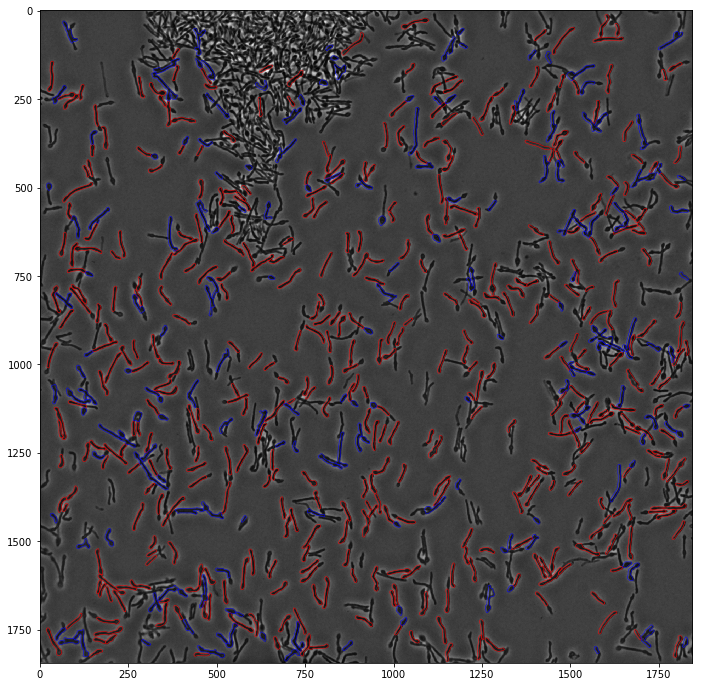

In [10]:
fig = plt.figure(figsize=(12,12))
plt.imshow(nd.ph_filtered.T,cmap = "gist_gray")
for cell in nd.cells:
    (x1,y1,x2,y2) = cell.bbox
    contour = cell.optimized_contour[0]
    xy = contour[:-1]
    adjusted_xy = np.array([xy.T[0]+x1,xy.T[1]+y1]).T
    plt.plot(adjusted_xy.T[0],adjusted_xy.T[1],c="r",linewidth = 0.5)
    
for cell in nd.celllike:
    (x1,y1,x2,y2) = cell.bbox
    contour = cell.init_contour[0]
    xy = contour[:-1]
    adjusted_xy = np.array([xy.T[0]+x1,xy.T[1]+y1]).T
    plt.plot(adjusted_xy.T[0],adjusted_xy.T[1],c="blue",linewidth = 0.5)

In [7]:
cells = pk.load(open("/Users/rubinlab_imaging/Desktop/test_2_plate_1_cells.pk","rb"))
print(len(cells))

551


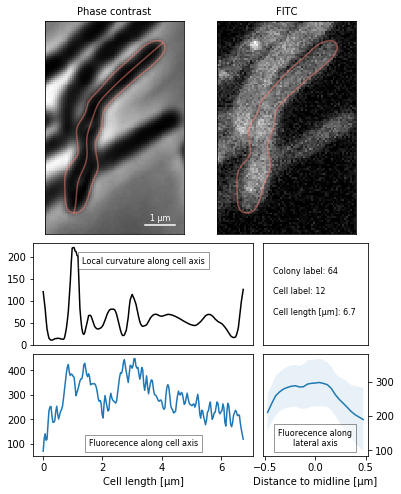

In [176]:
def vector_plot(data,ax,transverse = False):
    if data.shape[1] == 2:
        data = data.T
    if not transverse:
        ax.plot(data[1],data[0],color = 'salmon',alpha = 0.5)
    else:
        ax.plot(data[0],data[1],color = 'salmon',alpha = 0.5)

image = nd
from matplotlib.gridspec import GridSpec
transverse = False
(h,w) = cell.mask.shape
if h<w:
    transverse = True
    phase = cell.phase.T
else:
    phase = cell.phase
(x1,y1,x2,y2) = cell.bbox
n_fl_channels = len(nd.fl_img)
plot_width = 3*(n_fl_channels+1)
plot_height = 4+2*(n_fl_channels+1)
fig = plt.figure(figsize=(plot_width,plot_height))
gs = GridSpec(plot_height,plot_width)
ax1 = fig.add_subplot(gs[0:4,0:3])
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.imshow(phase,"gist_gray")
ax1.set_title("Phase contrast",fontsize = 10)
vector_plot(cell.optimized_contour[0],ax1,transverse = transverse)
vector_plot(cell.midline,ax1,transverse = transverse)
channel_counter = 1
len_two_micron = 1/cell.pixel_microns
if not transverse:
    bar_x,bar_y = w-5,h-5
else:
    bar_x,bar_y = h-5,w-5
ax1.plot([bar_x,bar_x-len_two_micron],[bar_y,bar_y],color = "white",alpha = 1)
ax1.text(bar_x-0.5*len_two_micron,bar_y-2,"1 μm",\
         fontsize = 8,color = "w",horizontalalignment='center')
for channel,fl in image.fl_img.items():
    fl_ax = fig.add_subplot(gs[0:4,3:3+3*channel_counter])
    channel_counter +=1
    fl_ax.get_xaxis().set_visible(False)
    fl_ax.get_yaxis().set_visible(False)
    data = fl[x1:x2,y1:y2]
    if transverse:
        data = data.T
    fl_ax.imshow(data,cmap = "gist_gray")
    vector_plot(cell.optimized_contour[0],fl_ax,transverse = transverse)
    fl_ax.set_title(channel,fontsize = 10)
shp_idx = cell.measure_along_midline["Shape_indexed"]
ax3 = fig.add_subplot(gs[4:6,:-2])
ax3.get_xaxis().set_visible(False)
ax3.plot(shp_idx,color = "black")
ax3.text(0.5,0.8,"Local curvature along cell axis",fontsize = 8,\
         horizontalalignment='center',transform=ax3.transAxes,\
         bbox = dict(facecolor='white', alpha=0.4))
ax4 = fig.add_subplot(gs[4:6,-2:])
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.text(0.1,0.7,"Colony label: "+str(cell.colony_label),fontsize = 8)
ax4.text(0.1,0.5,"Cell label: "+str(cell.cell_label),fontsize = 8)
ax4.text(0.1,0.3,"Cell length [μm]: "+str(round(cell.length,1)),fontsize = 8)
channel_counter = 0
for channel,fl in image.fl_img.items():
    fl_measure = fig.add_subplot(gs[6+2*channel_counter:6+2*channel_counter+2,:-2])
    data = cell.measure_along_midline[channel]
    x_axial = np.linspace(0,cell.length,len(data))
    fl_measure.plot(x_axial,data)
    fl_measure.set_xlabel("Cell length [μm]")
    fl_measure.text(0.5,0.1,"Fluorecence along cell axis",fontsize = 8,\
                    horizontalalignment='center',transform=fl_measure.transAxes,\
                    bbox = dict(facecolor='white', alpha=0.4))
    fl_lateral = fig.add_subplot(gs[6+2*channel_counter:6+2*channel_counter+2,-2:])
    lateral_data = cell.fl_straighten[channel]
    mean,std = lateral_data[0],lateral_data[1]
    maxwidth = cell.width.max()*cell.pixel_microns
    x_lateral = np.linspace(-0.5*maxwidth,0.5*maxwidth,len(mean))
    fl_lateral.plot(x_lateral,mean)
    fl_lateral.fill_between(x_lateral,mean-std,mean+std,alpha=0.1)
    fl_lateral.get_yaxis().tick_right()
    fl_lateral.set_xlabel("Distance to midline [μm]")
    fl_lateral.text(0.5,0.1,"Fluorecence along\nlateral axis",fontsize = 8,\
                    horizontalalignment='center',transform=fl_lateral.transAxes,\
                    bbox = dict(facecolor='white', alpha=0.4))
    channel_counter +=1

In [8]:
import nd2reader

In [7]:
nd = im.IO.process_nd2_no_output("/Users/rubinlab_imaging/Desktop/NDExp_WellG01_Point0000_Seq0096.nd2")

In [22]:
n = 0
for i in range(len(nd.cells)):
    if nd.cells[i].cell_label == 0:
        print(i)
        n+=1
        if n ==10:
            break

930
931
950
951
952
953


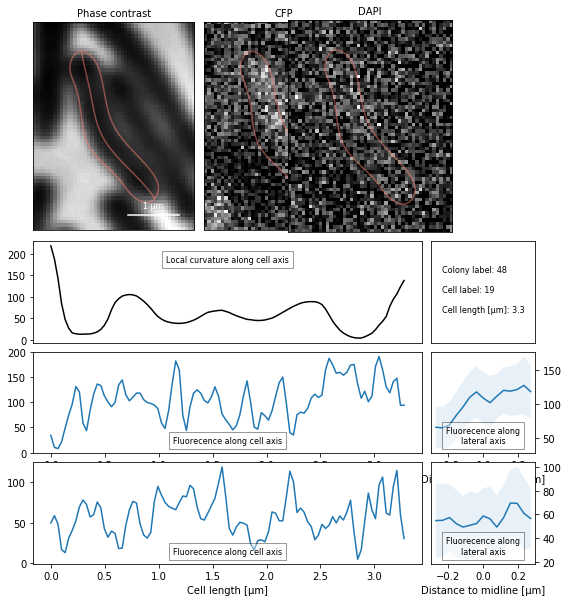

In [32]:
nd.cells[166].plot_advanced(nd)

In [6]:
pattern = re.compile("Well([A-Z])([0-9]{1,2})")

In [11]:
fig.savefig("/Users/jz-rolling/Desktop/summary/contours_bulge.png",bbox_inches = "tight",dpi = 300)
#fig2 = plt.figure(figsize=(12,12))
#plt.imshow(nd.ph_filtered.T,cmap = "gist_gray")
#fig2.savefig("/Users/jz-rolling/Desktop/summary/ph.png",bbox_inches = "tight",dpi = 300)

In [24]:
files = glob.glob("/Volumes/Sam/MSR13_IDW/10182019_raw_files/*.nd2")

In [25]:
rootpath = "/Volumes/Sam/MSR13_IDW/10182019_raw_files/"
for file in files:
    filename = file.split("/")[-1]
    os.rename(file,rootpath+"Well"+filename)

In [9]:
def unit_perpendicular_vector(data):
    d = data.copy()
    dxy = d[1:]-d[:-1]
    dxy_perp = np.vstack([np.ones(len(dxy)),-(dxy.T[0]/dxy.T[1])]).T
    dxy_perp = np.vstack([dxy_perp[0],dxy_perp])
    vector_length = np.sqrt(np.sum(np.square(dxy_perp),axis=1))
    dxy_unit = dxy_perp/np.vstack([vector_length,vector_length]).T
    return(dxy_unit)

def bilinear_interpolate_numpy(im, x, y):
    h,l = im.shape
    padded = np.zeros((h+1,l+1))
    padded[:h,:l] += im
    im = padded
    x0 = x.astype(int)
    x1 = x0 + 1
    y0 = y.astype(int)
    y1 = y0 + 1
    Ia = im[x0,y0]
    Ib = im[x0,y1]
    Ic = im[x1,y0]
    Id = im[x1,y1]
    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)
    return np.round((Ia*wa) + (Ib*wb) + (Ic*wc) + (Id*wd),2)

def larget_curvature(data,window = 5,cutoff = 1):
    output = []
    length = len(data)
    p1 = np.concatenate((data[-window:],data[:-window])).T
    p2 = data.copy().T
    p3 = np.concatenate((data[window:],data[0:window])).T
    p1p2 = p1[0]*1+p1[1]*1j - (p2[0]*1+p2[1]*1j)
    p3p2 = p3[0]*1+p3[1]*1j - (p2[0]*1+p2[1]*1j)
    return (np.angle(p3p2/p1p2,deg = True))

def straighten_cell_normalize_width(img,width,midline,\
                                    subpixel = 0.5,\
                                    remove_cap = 5,\
                                    pad = 2):
    decapped_midline = midline[remove_cap+1:-remove_cap-1]
    if remove_cap > 0:
        decapped_width = width[remove_cap:-remove_cap].copy()
    else:
        decapped_width = width.copy()
    unit_dxy = unit_perpendicular_vector_angle(decapped_midline)*subpixel
    normalization_factor = decapped_width/np.median(decapped_width)
    width_normalized_dxy = unit_dxy*(np.vstack([normalization_factor,normalization_factor]).T)
    data = bilinear_interpolate_numpy(img,decapped_midline.T[0],decapped_midline.T[1])
    copied_img = img.copy()
    for i in range(1,int(np.median(decapped_width)*0.5/subpixel)+pad):
        dxy = width_normalized_dxy*i
        v1 = decapped_midline+dxy
        v2 = decapped_midline-dxy
        p1 = bilinear_interpolate_numpy(copied_img,v1.T[0],v1.T[1])
        p2 = bilinear_interpolate_numpy(copied_img,v2.T[0],v2.T[1])
        data = np.vstack([p1,data,p2])
    return (data)

In [88]:
folder = "/Volumes/Sam/MSR_PP1_IDW/07072018_raw_files/output/Well_G05/"
pks = pk.load(open(folder+"MSR_PP1_G05_1_sample_1_cells.pk","rb"))

/Users/jz-rolling/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


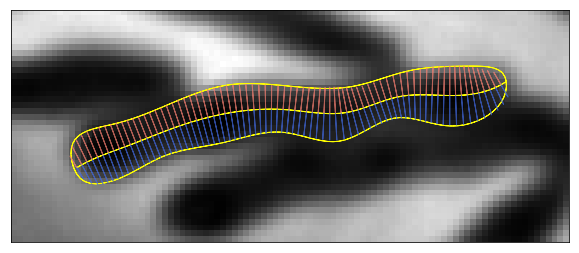

In [129]:
cell = pks[130]
dxy_perp =  im.helper_func.unit_perpendicular_vector_angle(cell.midline)
#tifffile.imshow(cell.fl_img["FITC"],cmap="Greys")
fig = plt.figure(figsize=(10,8))
#plt.imshow(cell.fl_img["FITC"],cmap="gist_gray")
plt.imshow(cell.phase,cmap="gist_gray")
ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
width_list = np.pad(cell.width,(1,1),'constant', constant_values=(0,0))
unit_dxy = im.helper_func.unit_perpendicular_vector(cell.midline)
init_contour = cell.init_contour[0]
init_polygon = cell.init_polygon[0]
optimized_contour = cell.optimized_contour[0]


for j in range(len(optimized_contour)-1):
    (x1,y1) = optimized_contour[j]
    (x2,y2) = optimized_contour[j+1]
    ax.arrow(y1,x1,(y2-y1),(x2-x1),head_width = 0,color='yellow')


for i in range(1,len(cell.midline)-1,2):
    (x1,y1) = cell.midline[i]
    (x2,y2) = cell.midline[i+1]
    (dx,dy) = dxy_perp[i]*width_list[i]*0.5
    ax.arrow(y1,x1,(y2-y1)*2,(x2-x1)*2,head_width = 0,color='yellow')
    ax.arrow(y1,x1,dy,dx,head_width = 0,color="salmon",alpha = 0.7)
    ax.arrow(y1,x1,-dy,-dx,head_width = 0,color="royalblue",alpha = 0.7)


fig.savefig("/Users/jz-rolling/PycharmProjects/IMyG_2/Manuscript/segmentation005.png",dpi=200,bbox_inches = "tight")

In [92]:
def scatter_plot(fig,gridspec,grid_coordinate,global_mean_dict,well_data,key1,key2,\
                                    xrange=[],yrange=[],plot_std = False,dist_plot = False,dist_height = 3):
    from matplotlib.gridspec import GridSpec
    from matplotlib import cm
    if not dist_plot:
        (x1,x2,y1,y2) = grid_coordinate
    else:
        (x1,x2,y1,y2) = grid_coordinate
        x1 += dist_height
        y2 -= dist_height
    ax = fig.add_subplot(gridspec[x1:x2,y1:y2])
    sns.scatterplot(x=key1,y=key2,data=well_data,ax=ax,alpha = 0.2,s=25,edgecolor="tab:blue")
    ax.tick_params(axis="both",length=0)
    mean_1,std_1 = global_mean_dict[key1][0],global_mean_dict[key1][1]
    mean_2,std_2 = global_mean_dict[key2][0],global_mean_dict[key2][1]
    if plot_std:
        ax.axvspan(mean_1 - std_1, mean_1 + std_1,alpha=0.2,color="navy")
        ax.axhspan(mean_2 - std_2, mean_2 + std_2,alpha=0.2,color="navy")
    else:
        ax.axvline(mean_1,alpha=0.5,color="navy",linewidth=2,ls=':')
        ax.axhline(mean_2,alpha=0.5,color="navy",linewidth=2,ls=':')
    if len(xrange) != 0:
        ax.set_xticks(xrange)
    if len(yrange) != 0:
        ax.set_yticks(yrange)
    if dist_plot:
        ax2 = fig.add_subplot(gridspec[x1-dist_height:x1,y1:y2])
        ax3 = fig.add_subplot(gridspec[x1:x2,y2:y2+dist_height])
        sns.distplot(well_data[key1],ax=ax2)
        sns.distplot(well_data[key2],ax=ax3,vertical=True)
        if len(xrange) != 0:
            ax2.set_xticks(xrange)
        if len(yrange) != 0:
            ax3.set_yticks(yrange)
        ax2.axis("off")
        ax3.axis("off")

166

In [84]:
from math import pi
def unit_perpendicular_vector_angle(data):
    dxy = data[1:]-data[:-1]
    dxy_comp = np.angle(dxy.T[0]*1+dxy.T[1]*1j)+0.5*pi
    dx,dy = np.cos(dxy_comp),np.sin(dxy_comp)
    dxy_perp = np.vstack([dx,dy]).T
    dxy_perp = np.concatenate((dxy_perp,[dxy_perp[-1]]),axis=0)
    return(dxy_perp)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x134a6d048>)

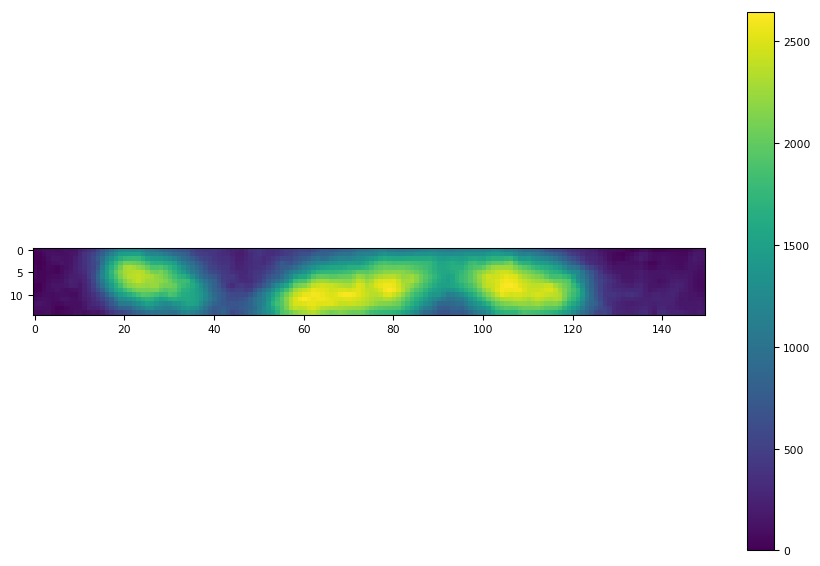

In [118]:
midline_measure = straighten_cell_normalize_width(cell.fl_img["FITC"],cell.width,cell.midline,remove_cap=1,pad=0)
tifffile.imshow(midline_measure)

In [410]:
from skimage import draw

In [7]:
from skimage import draw
import pickle as pk
def create_canvas(width=101,height = 600):
    canvas = np.zeros((width,height))
    r = int(width/2)
    rr1,cc1 = draw.ellipse(r,int(r*1.6),r,int((r)*1.6))
    rr2,cc2 = draw.ellipse(r,int(height-1.6*r),r,int((r)*1.6))
    rr3,cc3 = draw.rectangle(start = (1,int(r*1.6)),end = (width-2,height-int(r*1.6)),shape = canvas.shape)
    canvas[rr3,cc3] = 1
    canvas[rr1,cc1] = 1
    canvas[rr2,cc2] = 1
    l = len(np.nonzero(np.sum(canvas,axis=0))[0])
    counter = 0
    canvas = canvas.T
    return canvas

def create_mesh(canvas):
    xt,yt = np.nonzero(canvas)
    l,m = np.sum(canvas,axis=0),np.sum(canvas,axis=1)
    norm_yt = np.zeros(xt.shape)
    norm_xt = (xt-xt.min())/(l.max()-1)
    count = 0
    for i in range(len(xt)):
        r = m.max()/m[xt[i]]
        norm_yt[i] = count*r/(m.max()-1)
        if i != len(xt)-1:
            if xt[i+1] == xt[i]:
                count += 1
            else:
                count = 0
        else:
            count += 1
    return(xt,yt,norm_xt,norm_yt)
            
def project_image(xt,yt,norm_xt,norm_yt,canvas,data):
    paint = np.zeros(canvas.shape)
    xid = norm_xt.copy()
    yid = norm_yt.copy()
    xid *= data.shape[0]-1
    yid *= data.shape[1]-1
    interpolated = bilinear_interpolate_numpy(data,xid,yid)
    paint[xt,yt] = interpolated
    return(paint)

def normalize_data(data,percentile = 0.1,re_align = True):
    half_l = int(0.5*data.shape[1])
    if data[:,:half_l].mean() < data[:,half_l:].mean():
        if re_align:
            data = np.flip(data,axis=1)
    th_low = np.percentile(data,percentile)
    normalized_data = (data-th_low)/(data.max()-th_low)
    normalized_data[normalized_data>1] = 1
    normalized_data[normalized_data<0] = 0
    return normalized_data

def group_by_length(length):
    if length < 3:
        return 1
    elif length < 4:
        return 2
    elif length < 5:
        return 3
    elif length < 6:
        return 4
    else:
        return 5

In [8]:
#create_msr_pathdict
from math import isnan
path_dict = {}
plates = glob.glob("/Volumes/Sam/MSR*_IDW/")
for plate in plates:
    plate_name = plate.split("/")[-2][:-4]
    if plate_name not in path_dict:
        path_dict[plate_name] = {}
    subfolder = glob.glob(plate+"*raw_files/")[0]
    if len(glob.glob(subfolder+"*raw_files/")) > 0:
        babyfolders = glob.glob(subfolder+"*raw_files/")
        for babyfolder in babyfolders:
            wells = glob.glob(babyfolder+"output/Well*/")
            batch = babyfolder.split("/")[-2][:-10]
            if len(wells)>0:
                for well_folder in wells:
                    well = well_folder.split("/")[-2][-3:]
                    if well in path_dict[plate_name]:
                        path_dict[plate_name][well].append(well_folder)
                    else:
                        path_dict[plate_name][well] = [well_folder]
    else:
        wells = glob.glob(subfolder+"output/Well*/")
        batch = subfolder.split("/")[-2][:-10]
        if len(wells)>0:
            for well_folder in wells:
                well = well_folder.split("/")[-2][-3:]
                if well in path_dict[plate_name]:
                    path_dict[plate_name][well].append(well_folder)
                else:
                    path_dict[plate_name][well] = [well_folder]
                    
#create_msr_infodict
msr_info = pd.read_excel("/Users/jz-rolling/Desktop/AutoP/MSR_reference_new.xls")
MSR_dict = {}
for i in msr_info.index:
    plate = msr_info.iloc[i]["MSR_INDEX"]
    if plate == "PP1":
        plate = "MSR_PP1"
    if plate not in MSR_dict:
        MSR_dict[plate] = {}
    well = msr_info.iloc[i]["WELL_NO"]
    locus = msr_info.iloc[i]["MSMEG_####"]
    if not isnan(locus):
        locus = "MSMEG_{}".format(str(int(locus)).zfill(4))
        MSR_dict[plate][well] = locus

In [9]:
from skimage import measure
width = 75
heights = [250,350,450,550,650]
pad = np.zeros((50,width))
gap = np.zeros((750,10))
padded = [gap]
xt_list,yt_list,nxt_list,nyt_list = [],[],[],[]
for i in range(len(heights)):
    a = create_canvas(width=width,height=heights[i])
    half_pad = np.tile(pad,(len(heights)-i,1))
    m_pad = np.concatenate([half_pad,a,half_pad],axis = 0)
    m_pad = np.concatenate([m_pad,gap],axis = 1)
    xt,yt,norm_xt,norm_yt = create_mesh(m_pad)
    xt_list.append(xt)
    yt_list.append(yt)
    nxt_list.append(norm_xt)
    nyt_list.append(norm_yt)
    padded.append(m_pad)

contours = measure.find_contours(np.concatenate(padded,axis=1),level=0)
optimized_outline = []
for contour in contours:
    optimized_outline.append(im.helper_func.spline_approximation(contour,n=2*len(contour)))


def project_by_length(folder,plate,well,locus,rep):
    well = folder.split("/")[-2]
    #print(well)
    files = glob.glob(folder+"*.pk")
    pks = []
    for file in files:
        pks += pk.load(open(file,"rb"))
    x = np.array([0])
    well_paints=padded.copy()
    for m in well_paints:
        m*=0
    group_count = [0,0,0,0,0]
    for cell in pks:
        if cell.is_good_baby:
            if cell.SNR["FITC"] > 3:
                try:
                    group = group_by_length(cell.length)
                    group_count[group-1] += 1
                    canvas = padded[group].copy()
                    data = straighten_cell_normalize_width(cell.fl_img["FITC"],\
                                                       cell.width,cell.midline,\
                                                       remove_cap=0,pad=-1)
                    normalized_data = normalize_data(data)
                    well_paints[group]  += project_image(xt_list[group-1],\
                                                     yt_list[group-1],\
                                                     nxt_list[group-1],\
                                                     nyt_list[group-1],\
                                                     canvas,normalized_data.T)
                except:
                    continue
    for i in range(len(well_paints)):
        graph = well_paints[i]
        if graph.max()>0:
            min_val = graph[graph>0].min()
            normalized = (graph-min_val)/(graph.max()-min_val)
            normalized[graph==0] = 0
            if (i > 0) and (group_count[i-1] < 10):
                normalized *= 0
            well_paints[i] = normalized
    painttttt = np.concatenate(well_paints,axis = 1)
    fig = plt.figure(figsize=(8,8))
    plt.imshow(painttttt)
    for outline in optimized_outline:
        plt.plot(outline.T[1],outline.T[0],c="b",alpha = 0.5)
    fig.savefig("/Users/jz-rolling/Desktop/summary/rod_projection/{}_{}_{}_{}.png".format(plate,well,locus,rep),\
                bbox_inches = "tight")
    plt.close

In [ ]:
for plate,wells in path_dict.items():
    for well,paths in wells.items():
        try:
            locus = MSR_dict[plate][well]
            for i in range(len(paths)):
                folder = paths[i]
                project_by_length(folder,plate,well,locus,i)
        except:
            print("Error found")

Error found
Error found
Error found
Error found
Error found
Error found
Error found
Error found
Error found
Error found
Error found


In [60]:
import pickle as pk


In [689]:
memb = x.copy()
memb[memb==0] = 0.01

In [692]:
contrast = memb/cytosol

In [693]:
contrast[contrast==1.0] = 0 

In [695]:
contrast[contrast>1] =1 

In [61]:
len(padded)

6

In [799]:
normalized_data.min()

-0.19440519811522236

In [11]:
im.helper_func.unit_perpendicular_vector_angle(cell.midline)

array([[-0.98594528,  0.16706854],
       [-0.98533658,  0.17062188],
       [-0.98472386,  0.17412329],
       [-0.98410772,  0.17757253],
       [-0.98348873,  0.18096938],
       [-0.98286748,  0.18431365],
       [-0.98224453,  0.18760515],
       [-0.98162044,  0.19084369],
       [-0.98099577,  0.19402911],
       [-0.98037107,  0.19716126],
       [-0.97974688,  0.20023998],
       [-0.97912373,  0.20326515],
       [-0.97850214,  0.20623664],
       [-0.97788264,  0.20915434],
       [-0.97726573,  0.21201815],
       [-0.97665191,  0.21482796],
       [-0.97604167,  0.2175837 ],
       [-0.97543549,  0.22028528],
       [-0.97483385,  0.22293263],
       [-0.97423722,  0.2255257 ],
       [-0.97364604,  0.22806443],
       [-0.97306077,  0.23054876],
       [-0.97248184,  0.23297867],
       [-0.97190969,  0.23535412],
       [-0.97134472,  0.23767507],
       [-0.97078735,  0.23994151],
       [-0.97023797,  0.24215341],
       [-0.96969699,  0.24431077],
       [-0.96916477,

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x1422a2400>)

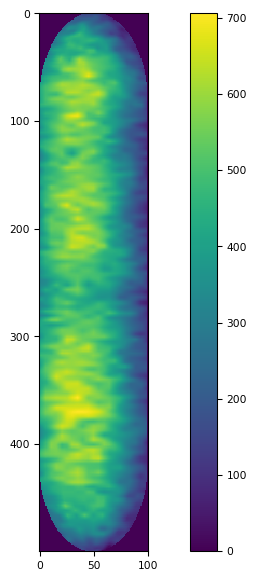

In [309]:
tifffile.imshow(project_image(create_canvas(),data.T))

In [10]:
MSR_dict

{'MSR1': {'A01': 'MSMEG_0024',
  'A02': 'MSMEG_0229',
  'A03': 'MSMEG_0384',
  'A04': 'MSMEG_0710',
  'A06': 'MSMEG_0033',
  'A07': 'MSMEG_0225',
  'A08': 'MSMEG_0301',
  'A10': 'MSMEG_0415',
  'A11': 'MSMEG_0621',
  'A12': 'MSMEG_0713',
  'B01': 'MSMEG_0026',
  'B02': 'MSMEG_0234',
  'B03': 'MSMEG_0435',
  'B04': 'MSMEG_0711',
  'B05': 'MSMEG_0007',
  'B06': 'MSMEG_0095',
  'B08': 'MSMEG_0310',
  'B09': 'MSMEG_0382',
  'B10': 'MSMEG_0518',
  'B11': 'MSMEG_0622',
  'B12': 'MSMEG_0732',
  'C01': 'MSMEG_0034',
  'C02': 'MSMEG_0248',
  'C03': 'MSMEG_0436',
  'C04': 'MSMEG_0759',
  'C05': 'MSMEG_0021',
  'C06': 'MSMEG_0149',
  'C07': 'MSMEG_0240',
  'C08': 'MSMEG_0311',
  'C09': 'MSMEG_0385',
  'C11': 'MSMEG_0635',
  'C12': 'MSMEG_0736',
  'D01': 'MSMEG_0035',
  'D02': 'MSMEG_0252',
  'D03': 'MSMEG_0508',
  'D04': 'MSMEG_0768',
  'D05': 'MSMEG_0028',
  'D06': 'MSMEG_0150',
  'D07': 'MSMEG_0244',
  'D08': 'MSMEG_0339',
  'D09': 'MSMEG_0389',
  'D10': 'MSMEG_0559',
  'D11': 'MSMEG_0674',
  '

In [130]:
cell = pks[130]

In [132]:
cell.plot_advanced(output_path="/Users/jz-rolling/Desktop/",savefig=True)

In [254]:
id_list = np.vstack([xt,norm_yt]).T

In [297]:
norm_xy = np.vstack([norm_xt,norm_yt]).T

In [298]:
interpolated = bilinear_interpolate_numpy(data.T,norm_xt,norm_yt)

In [283]:
norm_yt.max()

18.0

In [224]:
canvas[canvas==0]=1000

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x1444b80b8>)

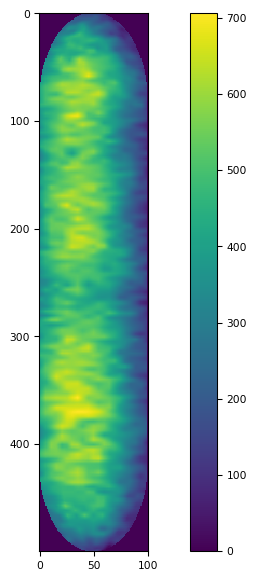

In [300]:
tifffile.imshow(paint)

In [20]:

a = create_canvas(width=75,height=250)

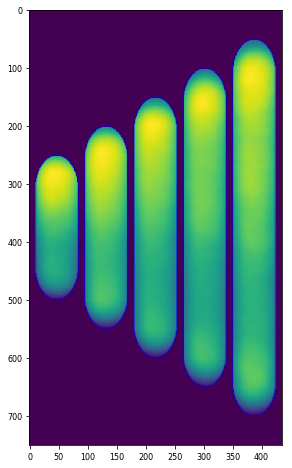

In [ ]:
try:
            if cell.SNR["FITC"] > 3 and (8>cell.length>5) and cell.cell_label == 0:
                
                if len(x) == 1:
                    x = output
                else:
                    x += output
                n+=1
        except:
            continue
    if len(x) > 1:
        xmin = x[x>0].min()
        x = (x-xmin)/(x.max()-xmin)
        plt.imsave("/Users/jz-rolling/Desktop/summary/rod_projection/{}_projection.png".format(well),x)

In [64]:
pad = np.zeros((50,width))
gap = np.zeros((750,10))
padded = [gap]
xt_list,yt_list,nxt_list,nyt_list = [],[],[],[]
for i in range(len(height)):
    a = create_canvas(width=width,height=height[i])
    half_pad = np.tile(pad,(len(height)-i,1))
    m_pad = np.concatenate([half_pad,a,half_pad],axis = 0)
    m_pad = np.concatenate([m_pad,gap],axis = 1)
    xt,yt,norm_xt,norm_yt = create_mesh(m_pad)
    xt_list.append(xt)
    yt_list.append(yt)
    nxt_list.append(norm_xt)
    nyt_list.append(norm_yt)
    padded.append(m_pad)

In [65]:
nxt_list

[array([1.01209677, 1.01209677, 1.01209677, ..., 2.00806452, 2.00806452,
        2.00806452]),
 array([0.57758621, 0.57758621, 0.57758621, ..., 1.57471264, 1.57471264,
        1.57471264]),
 array([0.33705357, 0.33705357, 0.33705357, ..., 1.33482143, 1.33482143,
        1.33482143]),
 array([0.18430657, 0.18430657, 0.18430657, ..., 1.18248175, 1.18248175,
        1.18248175]),
 array([0.0787037 , 0.0787037 , 0.0787037 , ..., 1.07716049, 1.07716049,
        1.07716049])]

In [67]:
output=padded.copy()
for m in output:
    m*=0

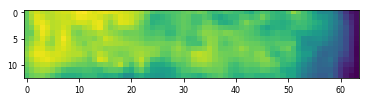

In [79]:
plt.imshow(normalized_data)

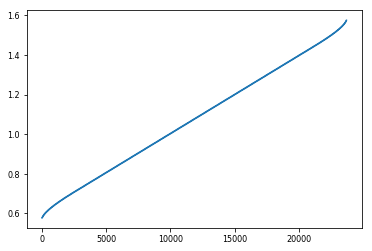

In [88]:
plt.plot(nxt_list[1])

In [123]:
width = 75
heights = [250,350,450,550,650]
pad = np.zeros((50,width))
gap = np.zeros((750,10))
padded = [gap]
xt_list,yt_list,nxt_list,nyt_list = [],[],[],[]
for i in range(len(heights)):
    a = create_canvas(width=width,height=heights[i])
    half_pad = np.tile(pad,(len(heights)-i,1))
    m_pad = np.concatenate([half_pad,a,half_pad],axis = 0)
    m_pad = np.concatenate([m_pad,gap],axis = 1)
    xt,yt,norm_xt,norm_yt = create_mesh(m_pad)
    xt_list.append(xt)
    yt_list.append(yt)
    nxt_list.append(norm_xt)
    nyt_list.append(norm_yt)
    padded.append(m_pad)

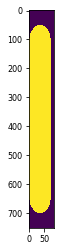

In [124]:
plt.imshow(m_pad)

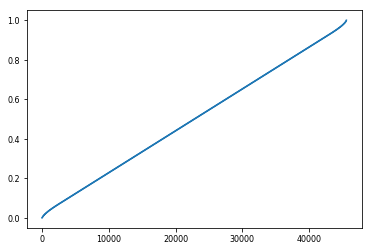

In [125]:
plt.plot(norm_xt)

In [146]:
paints

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([

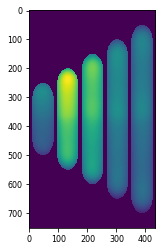

In [147]:
plt.imshow(np.concatenate(paints,axis=1))

In [8]:
cell.midline

array([[12.79271026, 10.41086925],
       [12.87748727, 10.91117585],
       [12.96401636, 11.41087889],
       [13.05227109, 11.9099881 ],
       [13.14222502, 12.40851322],
       [13.23385174, 12.90646398],
       [13.3271248 , 13.40385014],
       [13.42201778, 13.90068141],
       [13.51850423, 14.39696755],
       [13.61655774, 14.89271829],
       [13.71615187, 15.38794337],
       [13.81726018, 15.88265252],
       [13.91985624, 16.37685548],
       [14.02391363, 16.870562  ],
       [14.1294059 , 17.36378181],
       [14.23630664, 17.85652465],
       [14.3445894 , 18.34880026],
       [14.45422775, 18.84061837],
       [14.56519527, 19.33198872],
       [14.67746552, 19.82292106],
       [14.79101206, 20.31342511],
       [14.90580847, 20.80351062],
       [15.02182831, 21.29318733],
       [15.13904516, 21.78246497],
       [15.25743258, 22.27135328],
       [15.37696413, 22.759862  ],
       [15.49761339, 23.24800087],
       [15.61935393, 23.73577962],
       [15.7421593 ,